**DATA MINING PROJECT - GROUP NUMBER 10**

Sai Srikar Chalamala (2019AAPS0271H)

Shreya Enaganti (2019A7PS1207H)

Sanka Sreekara Amarnath (2019A3PS0418H)

Udandra Rohith Siddhartha (2019A4PS0683)

... we have done code formatting with pylint, black, flake8 :) 

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from collections import Counter
from itertools import combinations

**Importing and Extracting the Data from Drive Folder**

In [ ]:
#installing pydrive
!pip install PyDrive --quiet

#importing the necessary modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#authenticating and creating the pydrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#importing the zip files
#DHS dataset name decode:
#   IA (India) 
#   BR (Births Recode) - Data for all births to interviewed women
#   HR (Household Recode) - Data on all the households interviewed
#   KR (Children's Recode) - Data for children under 5 years of age of interviewed women
#   PR (Household Member Recode) - Data for every household member

#importing and Extracting IABR.zip
#downloaded = drive.CreateFile({'id':"1mcIkuYUclf3qx3Bp0UVz4YaqARoVF6_U"})
#downloaded.GetContentFile('IABR.zip')
#!unzip /content/IABR.zip -d /content/IABR
#!rm IABR.zip

#importing and Extracting IAHR.zip
#downloaded = drive.CreateFile({'id':"11WkWejBR_BBhS2T2chCTFDDPsGiDumtV"})
#downloaded.GetContentFile('IAHR.zip')
#!unzip /content/IAHR.zip -d /content/IAHR
#!rm IAHR.zip

#importing and Extracting IAKR.zip
downloaded = drive.CreateFile({'id':"1X-S8lI8vw2QWM_C3UJ02_Lsnmo5fbIfr"})
downloaded.GetContentFile('IAKR.zip')
!unzip /content/IAKR.zip -d /content/IAKR
!rm IAKR.zip

#importing and Extracting IAPR.zip
#downloaded = drive.CreateFile({'id':"1xuew-IwRybNAkkXtYOzckXCaJVoJwhsS"})
#downloaded.GetContentFile('IAPR.zip')
#!unzip /content/IAPR.zip -d /content/IAPR
#!rm IAPR.zip

In [2]:
# final_cols=['H2','HW1','H9','HW51','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','M6','S549G','B16','HW57']

df1 = pd.read_csv('IAKR/IAKR2005-06.csv', skipinitialspace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_20848\3058961490.py:3: DtypeWarning: Columns (1108) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('IAKR/IAKR2005-06.csv', skipinitialspace=True)


In [ ]:
#df1516 = pd.read_csv('/content/IAKR/IAKR2015-16.csv')
#df1921 = pd.read_csv('/content/IAKR/IAKR2019-21.csv')

<ipython-input-4-28146d47f96e>:1: DtypeWarning: Columns (36,46,86,114,282,289,291,303,305,326,409,410,411,413,414,415,416,417,418,425,503,504,510,560,561,562,566,656,657,661,665,669,673,677,681,685,689,694,742,743,774,778,807,813,814,917,926,962,963,964,966,968,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1221,1222,1223,1230,1231,1307,1311,1315,1319,1324,1325,1332,1336) have mixed types. Specify dtype option on import or set low_memory=False.
  df1516 = pd.read_csv('/content/IAKR/IAKR2015-16.csv')


# Target - Anemia level - HW57

# Data Preprocessing

## Attribute Subset Selection


In [5]:
df1.replace(' ','-1',inplace=True)

In [6]:
for i,p in enumerate(df1.columns):
    try:
        df1[p]=df1[p].astype(int)
    except ValueError:
        continue

In [7]:
cols=[]
corrs=[]
for i,p in enumerate(df1.columns):
    if(df1[p].dtype!=('object')):
    
        cols.append(p)

        corrs.append(df1['HW57'].corr(df1[p]))


C:\Users\shrey\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\shrey\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [8]:
# cols_c_n=
cols_cor = pd.DataFrame({'Column': cols,'Correlation Value': corrs})
cols_cor.sort_values('Correlation Value',ascending=False).head(75)

,Column,Correlation Value
831,HW57,1.000000
828,HW53,0.950333
830,HW56,0.854324
829,HW55,0.840123
827,HW52,0.678171
...,...,...
604,M57M,0.064097
997,S558F,0.063878
12,V012,0.063737
295,V447A,0.063671


##### The Features from have many unuseful columns. We have selected some using intuition. Below are the final features for next Steps of Data Preprocessing.



In [3]:
final_cols=['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','S549G','B16','V190','V130','V106','B4','V025','HW57']


H2   - Received BCG 

HW1  - Child's age in months

HW2  - Child's weight in kilograms

HW3  - Child's height in centimeters

H6   - Received POLIO 2    

H4   - Received POLIO 1  

HW10 - Weight/Height percentile    

H8   - Received POLIO 3  

V445 - Body Mass Index (2 decimals)  

HW4  - Height/Age percentile    

H5   - Received DPT2

H1   - Has health card  

H3   - Received DPT1

S549G- First source for antibiotic drug taken for fever

B16  - Child's line number in household

V190 - Wealth Index

V130 - Religion

V106 - Highest educational level of Mother

B4   - Gender of child

V025 - Type of Residence

HW57 - Anemia level


In [4]:
# S549G missing
new_final_cols=['CASEID','H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']

df1516 = pd.read_csv('IAKR/IAKR2015-16.csv', usecols = new_final_cols)
df1921 = pd.read_csv('IAKR/IAKR2019-21.csv', usecols = new_final_cols)

C:\Users\shrey\AppData\Local\Temp\ipykernel_20848\374746574.py:4: DtypeWarning: Columns (510,656,657,661,665,669,673,681) have mixed types. Specify dtype option on import or set low_memory=False.
  df1516 = pd.read_csv('IAKR/IAKR2015-16.csv', usecols = new_final_cols)
C:\Users\shrey\AppData\Local\Temp\ipykernel_20848\374746574.py:5: DtypeWarning: Columns (316) have mixed types. Specify dtype option on import or set low_memory=False.
  df1921 = pd.read_csv('IAKR/IAKR2019-21.csv', usecols = new_final_cols)


## Data Cleaning

In [5]:
dff1=df1[['CASEID']+final_cols].copy()
dff1

,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H1,H3,S549G,B16,V190,V130,V106,B4,V025,HW57
0,28 1 1 4,2.0,101.0,861.0,35.0,2.0,2.0,199.0,0.0,1659,...,2.0,2.0,0.0,6.0,2,1,1,1,2,3.0
1,28 1 6 5,2.0,138.0,929.0,52.0,2.0,2.0,4511.0,2.0,2045,...,0.0,2.0,1.0,7.0,3,2,0,1,2,4.0
2,28 1 8 5,1.0,79.0,705.0,11.0,1.0,1.0,2234.0,0.0,1729,...,1.0,1.0,0.0,8.0,4,1,2,2,2,4.0
3,28 1 8 5,1.0,107.0,800.0,23.0,1.0,1.0,4028.0,1.0,1729,...,1.0,1.0,0.0,7.0,4,1,2,1,2,1.0
4,28 1 10 4,2.0,118.0,855.0,35.0,2.0,2.0,3467.0,2.0,1874,...,3.0,2.0,0.0,5.0,3,2,0,1,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51550,19205 6 2,1.0,106.0,891.0,54.0,1.0,1.0,291.0,1.0,1765,...,1.0,1.0,0.0,3.0,1,1,2,2,2,4.0
51551,19205 15 2,1.0,106.0,876.0,49.0,1.0,1.0,306.0,1.0,1494,...,1.0,1.0,0.0,4.0,1,1,1,1,2,2.0
51552,19205 21 4,1.0,88.0,771.0,25.0,1.0,1.0,890.0,1.0,2069,...,1.0,1.0,0.0,5.0,2,1,2,2,2,4.0
51553,19205 26 4,2.0,123.0,928.0,40.0,2.0,2.0,911.0,2.0,2299,...,2.0,2.0,0.0,7.0,3,1,2,1,2,3.0


In [6]:
final_cols2=['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']
dff2=df1516[['CASEID']+final_cols2].copy()
dff3=df1921[['CASEID']+final_cols2].copy()

In [7]:
dff1['HW57'].value_counts()

2.0    12895
4.0    12660
3.0     9381
9.0     5772
8.0     1796
1.0      915
Name: HW57, dtype: int64

### Percentage of target missing is 17.3 % for which rows can be dropped

In [8]:
# dff1.drop(dff1.loc[dff1['HW57']>=8,:],axis=0)
dff1.drop((dff1[dff1['HW57']>=8].index).tolist(),axis=0,inplace=True)

In [9]:
dff1

,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H1,H3,S549G,B16,V190,V130,V106,B4,V025,HW57
0,28 1 1 4,2.0,101.0,861.0,35.0,2.0,2.0,199.0,0.0,1659,...,2.0,2.0,0.0,6.0,2,1,1,1,2,3.0
1,28 1 6 5,2.0,138.0,929.0,52.0,2.0,2.0,4511.0,2.0,2045,...,0.0,2.0,1.0,7.0,3,2,0,1,2,4.0
2,28 1 8 5,1.0,79.0,705.0,11.0,1.0,1.0,2234.0,0.0,1729,...,1.0,1.0,0.0,8.0,4,1,2,2,2,4.0
3,28 1 8 5,1.0,107.0,800.0,23.0,1.0,1.0,4028.0,1.0,1729,...,1.0,1.0,0.0,7.0,4,1,2,1,2,1.0
4,28 1 10 4,2.0,118.0,855.0,35.0,2.0,2.0,3467.0,2.0,1874,...,3.0,2.0,0.0,5.0,3,2,0,1,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51550,19205 6 2,1.0,106.0,891.0,54.0,1.0,1.0,291.0,1.0,1765,...,1.0,1.0,0.0,3.0,1,1,2,2,2,4.0
51551,19205 15 2,1.0,106.0,876.0,49.0,1.0,1.0,306.0,1.0,1494,...,1.0,1.0,0.0,4.0,1,1,1,1,2,2.0
51552,19205 21 4,1.0,88.0,771.0,25.0,1.0,1.0,890.0,1.0,2069,...,1.0,1.0,0.0,5.0,2,1,2,2,2,4.0
51553,19205 26 4,2.0,123.0,928.0,40.0,2.0,2.0,911.0,2.0,2299,...,2.0,2.0,0.0,7.0,3,1,2,1,2,3.0


In [10]:
continous_features= ['HW2','HW3','HW1','HW10','V445','HW4' ]
discrete_features= ['H2','H6','H4','H8','H5','H1','H3','S549G','B16','V190','V130','V106','B4','V025']

## Normalization
### Normalization is being done for only continous features

Min-Max Normalization


In [11]:
df_min_max_scaled = dff1.copy()
  
# apply normalization techniques
for column in continous_features:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
(df_min_max_scaled)

,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H1,H3,S549G,B16,V190,V130,V106,B4,V025,HW57
0,28 1 1 4,2.0,0.095670,0.067170,0.593220,2.0,2.0,0.019902,0.0,0.051734,...,2.0,2.0,0.0,6.0,2,1,1,1,2,3.0
1,28 1 6 5,2.0,0.132931,0.074112,0.881356,2.0,2.0,0.451145,2.0,0.095623,...,0.0,2.0,1.0,7.0,3,2,0,1,2,4.0
2,28 1 8 5,1.0,0.073515,0.051245,0.186441,1.0,1.0,0.223422,0.0,0.059693,...,1.0,1.0,0.0,8.0,4,1,2,2,2,4.0
3,28 1 8 5,1.0,0.101712,0.060943,0.389831,1.0,1.0,0.402840,1.0,0.059693,...,1.0,1.0,0.0,7.0,4,1,2,1,2,1.0
4,28 1 10 4,2.0,0.112790,0.066558,0.593220,2.0,2.0,0.346735,2.0,0.076180,...,3.0,2.0,0.0,5.0,3,2,0,1,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51550,19205 6 2,1.0,0.100705,0.070233,0.915254,1.0,1.0,0.029103,1.0,0.063786,...,1.0,1.0,0.0,3.0,1,1,2,2,2,4.0
51551,19205 15 2,1.0,0.100705,0.068702,0.830508,1.0,1.0,0.030603,1.0,0.032973,...,1.0,1.0,0.0,4.0,1,1,1,1,2,2.0
51552,19205 21 4,1.0,0.082578,0.057983,0.423729,1.0,1.0,0.089009,1.0,0.098351,...,1.0,1.0,0.0,5.0,2,1,2,2,2,4.0
51553,19205 26 4,2.0,0.117825,0.074010,0.677966,2.0,2.0,0.091109,2.0,0.124503,...,2.0,2.0,0.0,7.0,3,1,2,1,2,3.0


Z-score Normalization

In [19]:
df_z_scaled = dff1.copy()
  
# apply normalization techniques
for column in continous_features:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
(df_z_scaled)

,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H1,H3,S549G,B16,V190,V130,V106,B4,V025,HW57
0,28 1 1 4,2.0,-0.141602,-0.106695,0.330505,2.0,2.0,-0.879290,0.0,-0.495749,...,2.0,2.0,0.0,6.0,2,1,1,1,2,3.0
1,28 1 6 5,2.0,0.168653,-0.052031,1.309619,2.0,2.0,0.507479,2.0,-0.088408,...,0.0,2.0,1.0,7.0,3,2,0,1,2,4.0
2,28 1 8 5,1.0,-0.326079,-0.232100,-1.051772,1.0,1.0,-0.224820,0.0,-0.421879,...,1.0,1.0,0.0,8.0,4,1,2,2,2,4.0
3,28 1 8 5,1.0,-0.091291,-0.155732,-0.360633,1.0,1.0,0.352143,1.0,-0.421879,...,1.0,1.0,0.0,7.0,4,1,2,1,2,1.0
4,28 1 10 4,2.0,0.000947,-0.111518,0.330505,2.0,2.0,0.171722,2.0,-0.268862,...,3.0,2.0,0.0,5.0,3,2,0,1,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51550,19205 6 2,1.0,-0.099676,-0.082578,1.424809,1.0,1.0,-0.849702,1.0,-0.383889,...,1.0,1.0,0.0,3.0,1,1,2,2,2,4.0
51551,19205 15 2,1.0,-0.099676,-0.094637,1.136834,1.0,1.0,-0.844878,1.0,-0.669872,...,1.0,1.0,0.0,4.0,1,1,1,1,2,2.0
51552,19205 21 4,1.0,-0.250611,-0.179044,-0.245444,1.0,1.0,-0.657060,1.0,-0.063081,...,1.0,1.0,0.0,5.0,2,1,2,2,2,4.0
51553,19205 26 4,2.0,0.042874,-0.052835,0.618480,2.0,2.0,-0.650306,2.0,0.179635,...,2.0,2.0,0.0,7.0,3,1,2,1,2,3.0


Maximum Absolute Scaling


In [20]:
df_max_scaled = dff1.copy()
  
# apply normalization techniques
for column in continous_features:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H1,H3,S549G,B16,V190,V130,V106,B4,V025,HW57
0,28 1 1 4,2.0,0.101101,0.086109,0.593220,2.0,2.0,0.019902,0.0,0.165917,...,2.0,2.0,0.0,6.0,2,1,1,1,2,3.0
1,28 1 6 5,2.0,0.138138,0.092909,0.881356,2.0,2.0,0.451145,2.0,0.204520,...,0.0,2.0,1.0,7.0,3,2,0,1,2,4.0
2,28 1 8 5,1.0,0.079079,0.070507,0.186441,1.0,1.0,0.223422,0.0,0.172917,...,1.0,1.0,0.0,8.0,4,1,2,2,2,4.0
3,28 1 8 5,1.0,0.107107,0.080008,0.389831,1.0,1.0,0.402840,1.0,0.172917,...,1.0,1.0,0.0,7.0,4,1,2,1,2,1.0
4,28 1 10 4,2.0,0.118118,0.085509,0.593220,2.0,2.0,0.346735,2.0,0.187419,...,3.0,2.0,0.0,5.0,3,2,0,1,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51550,19205 6 2,1.0,0.106106,0.089109,0.915254,1.0,1.0,0.029103,1.0,0.176518,...,1.0,1.0,0.0,3.0,1,1,2,2,2,4.0
51551,19205 15 2,1.0,0.106106,0.087609,0.830508,1.0,1.0,0.030603,1.0,0.149415,...,1.0,1.0,0.0,4.0,1,1,1,1,2,2.0
51552,19205 21 4,1.0,0.088088,0.077108,0.423729,1.0,1.0,0.089009,1.0,0.206921,...,1.0,1.0,0.0,5.0,2,1,2,2,2,4.0
51553,19205 26 4,2.0,0.123123,0.092809,0.677966,2.0,2.0,0.091109,2.0,0.229923,...,2.0,2.0,0.0,7.0,3,1,2,1,2,3.0


Getting the data ready for Analysis part, 

we will be using the Min-Max normalization for continuous features

In [12]:
df_prep = df_min_max_scaled

In [22]:
df_min_max_scaled2 = dff2.copy()
  
# apply normalization techniques
for column in continous_features:
    for i in range(len(df_min_max_scaled2[column])):
        try:
            if((type(df_min_max_scaled2[column][i])) == str) :
                df_min_max_scaled2[column][i] = np.int64(df_min_max_scaled2[column][i])
        except:
            df_min_max_scaled2[column][i] = np.int64(0)
    #print(df_min_max_scaled2[column])
    df_min_max_scaled2[column] = (df_min_max_scaled2[column] - df_min_max_scaled2[column].min()) / (df_min_max_scaled2[column].max() - df_min_max_scaled2[column].min())    
  
# view normalized data
df_min_max_scaled2

C:\Users\shrey\AppData\Local\Temp\ipykernel_24388\2943433482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_max_scaled2[column][i] = np.int64(df_min_max_scaled2[column][i])
C:\Users\shrey\AppData\Local\Temp\ipykernel_24388\2943433482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_max_scaled2[column][i] = np.int64(0)


,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H5,H1,H3,B16,V190,V130,V106,B4,V025,HW57
0,01000110 02,1,0.015502,0.10021,0.830508,1,1,0.518852,1,0.127202,...,1,1,1,3,4,1,2,2,1,4
1,01000123 02,1,0.010101,0.083908,0.491525,1,1,0.078208,1,0.198249,...,1,1,1,3,4,1,3,2,1,4
2,01000227 04,0,0.006201,0.065207,0.067797,0,0,0.111211,0,0.120837,...,0,2,0,6,3,3,2,2,2,
3,01000227 04,0,0.012001,0.084608,0.508475,0,0,0.492849,0,0.120837,...,0,2,0,5,3,3,2,1,2,4
4,01000258 02,0,0.007901,0.067907,0.118644,0,0,0.469947,0,0.112425,...,0,2,0,5,5,3,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259622,36048211 04,1,0.014901,0.093909,0.59322,1,1,0.672667,1,0.106514,...,1,1,1,5,3,1,2,1,2,4
259623,36048218 02,1,0.009401,0.070307,0.135593,1,1,0.820182,1,0.058997,...,1,1,1,3,3,1,2,1,2,2
259624,36048261 07,2,0.0032,0.053205,0.033898,0,0,0.057606,0,0.104922,...,0,1,0,8,4,1,2,1,2,
259625,36048275 02,1,0.011301,0.083508,0.423729,1,1,0.325133,1,0.107196,...,1,1,1,4,4,1,2,1,2,2


In [23]:
df_min_max_scaled3 = dff3.copy()
  
# apply normalization techniques
for column in continous_features:
    for i in range(len(df_min_max_scaled3[column])):
        try:
            if((type(df_min_max_scaled3[column][i])) == str) :
                df_min_max_scaled3[column][i] = np.int64(df_min_max_scaled3[column][i])
        except:
            df_min_max_scaled3[column][i] = np.int64(0)
    #print(df_min_max_scaled3[column])
    df_min_max_scaled3[column] = (df_min_max_scaled3[column] - df_min_max_scaled3[column].min()) / (df_min_max_scaled3[column].max() - df_min_max_scaled3[column].min())    
  
# view normalized data
df_min_max_scaled3

C:\Users\shrey\AppData\Local\Temp\ipykernel_24388\1712051517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_max_scaled3[column][i] = np.int64(df_min_max_scaled3[column][i])
C:\Users\shrey\AppData\Local\Temp\ipykernel_24388\1712051517.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_max_scaled3[column][i] = np.int64(0)


,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H5,H1,H3,B16,V190,V130,V106,B4,V025,HW57
0,0100101399 02,,0.013101,0.128313,0.864407,,,0.9999,,0.291929,...,,,,5,3,2,2,1,2,2
1,0100101357 02,1,0.011101,0.090009,0.20339,1,1,0.054105,1,0.221322,...,1,1,1,6,1,2,1,2,2,2
2,0100101395 02,1,0.014501,0.10271,0.423729,1,1,0.124012,1,0.30413,...,1,1,1,3,1,2,2,2,2,2
3,0100101358 04,1,0.007801,0.089309,0.220339,1,1,0.9999,1,0.256626,...,1,1,1,5,3,2,2,1,2,2
4,0100101380 02,,0.012701,0.109711,0.661017,,,0.9999,,0.525553,...,,,,4,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232915,3700401542 04,1,0.009701,0.078308,0.288136,1,1,0.254325,1,0.217122,...,1,1,1,5,1,2,0,2,1,2
232916,3700401583 04,,0.012101,0.09631,0.813559,,,0.018702,,0.246225,...,,,,5,4,2,2,1,1,2
232917,3700401546 02,2,0.009801,0.078308,0.20339,2,2,0.169417,0,0.263726,...,2,2,2,4,4,2,0,1,1,1
232918,3700401554 02,1,0.0042,0.044804,0.016949,0,1,0.9999,0,0.213921,...,0,1,1,3,4,2,0,2,1,


In [24]:
df_prep2 = df_min_max_scaled2
df_prep3 = df_min_max_scaled3

In [25]:
#Saving the preprocessed data so that it will be easy to load again before analysis

df_prep.to_csv ('df_prep.csv')
df_prep2.to_csv ('df_prep2.csv')
df_prep3.to_csv ('df_prep3.csv')

#**Visualization**

Anemia Level

1 - Severe 
2 - Moderate
3 - Mild
4 - No Anemia


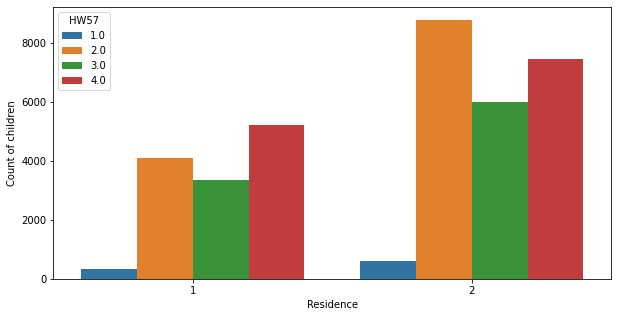

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
ax=sns.countplot(x='V025', hue='HW57', data=dff1)
ax.set(xlabel='Residence', ylabel='Count of children')
plt.show()
# 1 Urban
# 2 Rural

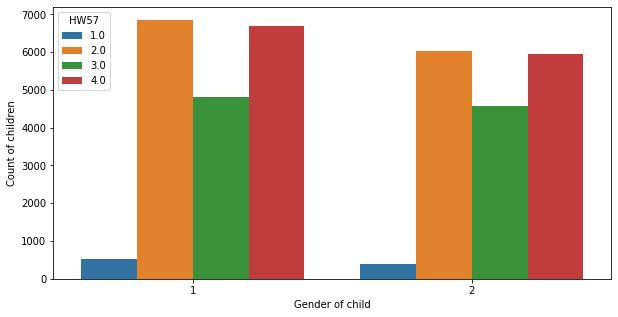

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
ax=sns.countplot(x='B4', hue='HW57', data=dff1)
ax.set(xlabel='Gender of child', ylabel='Count of children')
plt.show()

# 1 Male 
# 2 Female


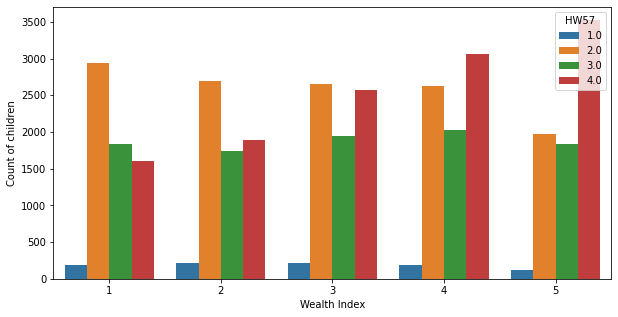

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
ax=sns.countplot(x='V190', hue='HW57', data=dff1)
ax.set(xlabel='Wealth Index', ylabel='Count of children')
plt.show()

# 1 Poorest 
# 2 Poor
# 3 Middle
# 4 Rich
# 5 Richest

In [ ]:
index1 = dff1.index.tolist()
index2 = df1516.index.tolist()
index3 = df1921.index.tolist()

In [ ]:
array = []

data1 = []
for i in index1:
    c1 = str(dff1.loc[i,'V106'])!=' '
    c2 = str(dff1.loc[i,'V106'])!='9'
    c3 = str(dff1.loc[i,'HW57'])!=' '
    c4 = str(dff1.loc[i,'HW57'])!='8'
    c5 = str(dff1.loc[i,'HW57'])!='9'
    if c1 and c2 and c3 and c4 and c5:
        array.append(int(dff1.loc[i,'V106']))
        array.append(int(dff1.loc[i,'HW57']))
        data1.append(array)
    array = []

data2 = []
for i in index2:
    c1 = str(df1516.loc[i,'V106'])!=' '
    c2 = str(df1516.loc[i,'V106'])!='9'
    c3 = str(df1516.loc[i,'HW57'])!=' '
    c4 = str(df1516.loc[i,'HW57'])!='8'
    c5 = str(df1516.loc[i,'HW57'])!='9'
    if c1 and c2 and c3 and c4 and c5:
        array.append(int(df1516.loc[i,'V106']))
        array.append(int(df1516.loc[i,'HW57']))
        data2.append(array)
    array = []

data3 = []
for i in index3:
    c1 = str(df1921.loc[i,'V106'])!=' '
    c2 = str(df1921.loc[i,'V106'])!='9'
    c3 = str(df1921.loc[i,'HW57'])!=' '
    c4 = str(df1921.loc[i,'HW57'])!='8'
    c5 = str(df1921.loc[i,'HW57'])!='9'
    if c1 and c2 and c3 and c4 and c5:
        array.append(int(df1921.loc[i,'V106']))
        array.append(int(df1921.loc[i,'HW57']))
        data3.append(array)
    array = []

In [ ]:
rows1 = 0
zero1 = 0
one1 = 0
two1 = 0
three1 = 0
for i in data1:
    rows1 = rows1+1
for i in range(rows1):
    if data1[i][0] == 0 and data1[i][1]<4:
        zero1 = zero1+1
    elif data1[i][0] == 1 and data1[i][1]<4:
        one1 = one1+1
    elif data1[i][0] == 2 and data1[i][1]<4:
        two1 = two1+1
    elif data1[i][0] == 3 and data1[i][1]<4:
        three1 = three1+1

rows2 = 0
zero2 = 0
one2 = 0
two2 = 0
three2 = 0
for i in data2:
    rows2 = rows2+1
for i in range(rows2):
    if data2[i][0] == 0 and data2[i][1]<4:
        zero2 = zero2+1
    elif data2[i][0] == 1 and data2[i][1]<4:
        one2 = one2+1
    elif data2[i][0] == 2 and data2[i][1]<4:
        two2 = two2+1
    elif data2[i][0] == 3 and data2[i][1]<4:
        three2 = three2+1
        
rows3 = 0
zero3 = 0
one3 = 0
two3 = 0
three3 = 0
for i in data3:
    rows3 = rows3+1
for i in range(rows3):
    if data3[i][0] == 0 and data3[i][1]<4:
        zero3 = zero3+1
    elif data3[i][0] == 1 and data3[i][1]<4:
        one3 = one3+1
    elif data3[i][0] == 2 and data3[i][1]<4:
        two3 = two3+1
    elif data3[i][0] == 3 and data3[i][1]<4:
        three3 = three3+1

In [ ]:
dict1 = {'No Education':zero1, 'Primary':one1, 'Secondary':two1, 'Higher':three1}
education1 = list(dict1.keys())
no_children1 = list(dict1.values())
fig1 = plt.figure(figsize = (5,3))
plt.bar(education1, no_children1, color ='blue',width = 0.4)
plt.xlabel("Education Level of the Mother")
plt.ylabel("Number of Children with Anemia")
plt.title("Education Level of the Mother vs Anemic Children in 2005-06")
plt.show()

dict2 = {'No Education':zero2, 'Primary':one2, 'Secondary':two2, 'Higher':three2}
education2 = list(dict2.keys())
no_children2 = list(dict2.values())
fig2 = plt.figure(figsize = (5,3))
plt.bar(education2, no_children2, color ='blue',width = 0.4)
plt.xlabel("Education Level of the Mother")
plt.ylabel("Number of Children with Anemia")
plt.title("Education Level of the Mother vs Anemic Children in 2015-16")
plt.show()

dict3 = {'No Education':zero3, 'Primary':one3, 'Secondary':two3, 'Higher':three3}
education3 = list(dict3.keys())
no_children3 = list(dict3.values())
fig3 = plt.figure(figsize = (5,3))
plt.bar(education3, no_children3, color ='blue',width = 0.4)
plt.xlabel("Education Level of the Mother")
plt.ylabel("Number of Children with Anemia")
plt.title("Education Level of the Mother vs Anemic Children in 2019-21")
plt.show()

In [ ]:
canemia1 = 0
canemian1 = 0
for i in index1:
    if ((str(df56.loc[i,'HW57'])>'0' and str(df56.loc[i,'HW57'])<'4')):
        canemia1 = canemia1+1
    elif str(df56.loc[i,'HW57'])=='4':
        canemian1 = canemian1+1
        
canemia2 = 0
canemian2 = 0
for i in index2:
    if ((str(df1516.loc[i,'HW57'])>'0' and str(df1516.loc[i,'HW57'])<'4')):
        canemia2 = canemia2+1
    elif str(df1516.loc[i,'HW57'])=='4':
        canemian2 = canemian2+1
        
canemia3 = 0
canemian3 = 0
for i in index3:
    if ((str(df1921.loc[i,'HW57'])>'0' and str(df1921.loc[i,'HW57'])<'4')):
        canemia3 = canemia3+1
    elif str(df1921.loc[i,'HW57'])=='4':
        canemian3 = canemian3+1

In [ ]:
anemiat = {'2005-06':canemia1, '2015-16':canemia2, '2019-21':canemia3}
year = list(anemiat.keys())
number = list(anemiat.values())
fig1 = plt.figure(figsize = (5,5))
plt.bar(year, number, color ='blue',width = 0.4)
plt.xlabel("Year")
plt.ylabel("Number of Children with Anemia")
plt.title("Anemic Children in 2005-06 vs 2015-16 vs 2019-21")
plt.show()

In [ ]:
a56 = [0,0,0]
a1516 = [0,0,0]
a1921 = [0,0,0]

for i in range(rows1):
    if data1[i][1] == 1:
        a56[0] = a56[0]+1
    elif data1[i][1] == 2:
        a56[1] = a56[1]+1
    elif data1[i][1] == 3:
        a56[2] = a56[2]+1

for i in range(rows2):
    if data2[i][1] == 1:
        a1516[0] = a1516[0]+1
    elif data2[i][1] == 2:
        a1516[1] = a1516[1]+1
    elif data2[i][1] == 3:
        a1516[2] = a1516[2]+1
        
for i in range(rows3):
    if data3[i][1] == 1:
        a1921[0] = a1921[0]+1
    elif data3[i][1] == 2:
        a1921[1] = a1921[1]+1
    elif data3[i][1] == 3:
        a1921[2] = a1921[2]+1

In [ ]:
mylabels = ["Severe", "Moderate", "Mild"]

plt.pie(a56, labels = mylabels)
plt.title("Distribution of Anemia Severity in 2005-06", bbox={'facecolor':'0.8', 'pad':5})
plt.legend()
plt.show()

plt.pie(a1516, labels = mylabels)
plt.title("Distribution of Anemia Severity in 2015-16", bbox={'facecolor':'0.8', 'pad':5})
plt.legend()
plt.show() 

plt.pie(a1921, labels = mylabels)
plt.title("Distribution of Anemia Severity in 2019-21", bbox={'facecolor':'0.8', 'pad':5})
plt.legend()
plt.show() 

Visualization of Anemia levels in each state

In [ ]:
df_sample = df1[['V024','HW57','V155','V106','V107','V133','H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9']]
fields = ['V024', 'HW57']
df15 = pd.read_csv('/content/IAKR/IAKR2015-16.csv', skipinitialspace=True, usecols=fields)
df19 = pd.read_csv('/content/IAKR/IAKR2019-21.csv', skipinitialspace=True, usecols=fields)

renaming the values so that it will be easy to interpret results

In [ ]:
dict = {1:'Jammu and Kashmir',
                               2:   'Himachal Pradesh',
                               3:   'Punjab',
                               5:   'Uttaranchal',
                               6:   'Haryana',
                               7:   'Delhi',
                               8:   'Rajasthan',
                               9:   'Uttar Pradesh',
                               10:  'Bihar',
                               11:  'Sikkim',
                               12:  'Arunachal Pradesh',
                               13:  'Nagaland',
                               14:  'Manipur',
                               15:  'Mizoram',
                               16:  'Tripura',
                               17:  'Meghalaya',
                               18:  'Assam',
                               19:  'West Bengal',
                               20:  'Jharkhand',
                               21:  'Orissa',
                               22:  'Chhattisgarh',
                               23:  'Madhya Pradesh',
                               24:  'Gujarat',
                               27:  'Maharashtra',
                               28:  'Andhra Pradesh',
                               29:  'Karnataka',
                               30:  'Goa',
                               32:  'Kerala',
                               33:  'Tamil Nadu', }
 
df_sample = df_sample.replace({"V024": dict})

In [ ]:
dict = {1:   'Andaman and Nicobar Islands',
                               2:   'Andhra Pradesh',
                               3:   'Arunachal Pradesh',
                               4:   'Assam',
                               5:   'Bihar',
                               6:   'Chandigarh',
                               7:   'Chhattisgarh',
                               8:   'Dadra and Nagar Haveli',
                               9:   'Daman and Diu',
                               10:  'Goa',
                               11:  'Gujarat',
                               12:  'Haryana',
                               13:  'Himachal Pradesh',
                               14:  'Jammu and Kashmir',
                               15:  'Jharkhand',
                               16:  'Karnataka',
                               17:  'Kerala',
                               18:  'Lakshadweep',
                               19:  'Madhya Pradesh',
                               20:  'Maharashtra',
                               21:  'Manipur',
                               22:  'Meghalaya',
                               23:  'Mizoram',
                               24:  'Nagaland',
                               25:  'Delhi',
                               26:  'Odisha',
                               27:  'Puducherry',
                               28:  'Punjab',
                               29:  'Rajasthan',
                               30:  'Sikkim',
                               31:  'Tamil Nadu',
                               32:  'Tripura',
                               33:  'Uttar Pradesh',
                               34:  'Uttarakhand',
                               35:  'West Bengal',
                               36:  'Telangana',}
df15 = df15.replace({"V024": dict})

In [ ]:
dict = {1:   'Jammu & Kashmir',
                               2:   'Himachal Pradesh',
                               3:   'Punjab',
                               4:   'Chandigarh',
                               5:   'Uttarakhand',
                               6:   'Haryana',
                               7:   'Nct Of Delhi',
                               8:   'Rajasthan',
                               9:   'Uttar Pradesh',
                               10:  'Bihar',
                               11:  'Sikkim',
                               12:  'Arunachal Pradesh',
                               13:  'Nagaland',
                               14:  'Manipur',
                               15:  'Mizoram',
                               16:  'Tripura',
                               17:  'Meghalaya',
                               18:  'Assam',
                               19:  'West Bengal',
                               20:  'Jharkhand',
                               21:  'Odisha',
                               22:  'Chhattisgarh',
                               23:  'Madhya Pradesh',
                               24:  'Gujarat',
                               25:  'Dadra & Nagar Haveli And Daman & Diu',
                               27:  'Maharashtra',
                               28:  'Andhra Pradesh',
                               29:  'Karnataka',
                               30:  'Goa',
                               31:  'Lakshadweep',
                               32:  'Kerala',
                               33:  'Tamil Nadu',
                               34:  'Puducherry',
                               35:  'Andaman & Nicobar Islands',
                               36:  'Telangana',
                               37:  'Ladakh',}
df19 = df19.replace({"V024": dict})

In [ ]:
dict = {1.0:  'Severe',
                               2.0:  'Moderate',
                               3.0:  'Mild',
                               4.0:  'Not anemic',
                               8.0:  'Nagaland: information not collected',
                               9.0:  'Missing',
                           ' ':   'Not applicable',}

In [ ]:
df_sample = df_sample.replace({"HW57": dict})
df_sample['HW57'].unique()

array(['Mild', 'Not anemic', 'Severe', nan, 'Missing', 'Moderate',
       'Nagaland: information not collected'], dtype=object)

In [ ]:
dict = {1.0:  'Severe',
                               2.0:  'Moderate',
                               3.0:  'Mild',
                               4.0:  'Not anemic',
                               9.0:  'Missing',
                           np.nan:   'Not applicable',}

In [ ]:
df15 = df15.replace({"HW57": dict})
df15['HW57'].unique()

array(['Not anemic', 'Not applicable', 'Moderate', 'Mild', 'Missing',
       'Severe'], dtype=object)

In [ ]:
df19 = df19.replace({"HW57": dict})
df19['HW57'].unique()

array(['Moderate', 'Not anemic', 'Not applicable', 'Mild', 'Severe',
       'Missing'], dtype=object)

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[48, 637, 375, 557, 367, 0]
[50, 635, 561, 894, 563, 425]
[52, 752, 584, 778, 253, 414]


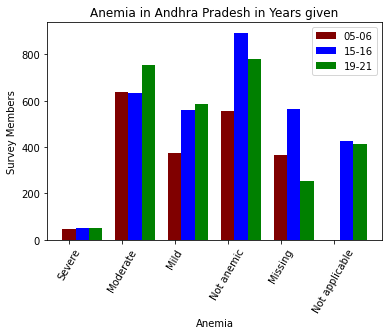

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[6, 200, 193, 287, 27, 0]
[38, 874, 1044, 1711, 657, 642]
[106, 1229, 1221, 2089, 159, 720]


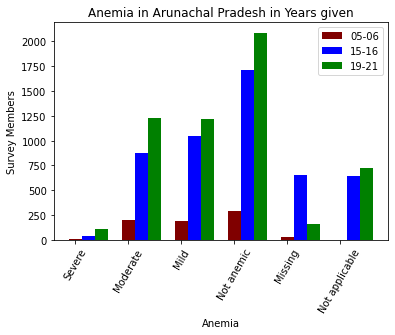

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[24, 421, 310, 351, 137, 0]
[33, 923, 1882, 5110, 840, 1521]
[73, 2953, 3187, 2545, 551, 1336]


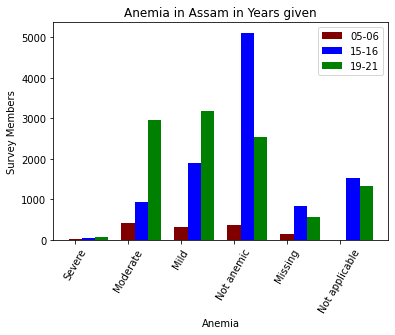

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[34, 823, 524, 437, 137, 0]
[256, 6609, 6467, 7628, 699, 3778]
[275, 6487, 5175, 4712, 1066, 3325]


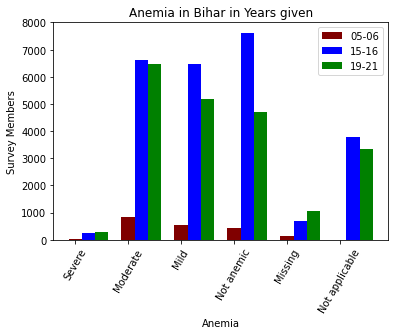

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[26, 567, 301, 351, 42, 0]
[44, 1192, 1824, 4080, 230, 1913]
[119, 2714, 1885, 2063, 443, 1290]


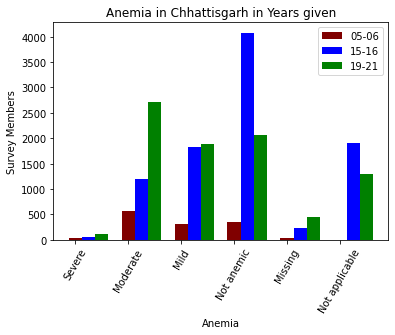

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[5, 213, 157, 244, 441, 0]
[44, 359, 224, 396, 348, 209]
[0, 0, 0, 0, 0, 0]


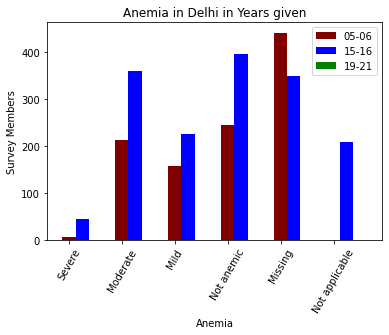

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[45, 510, 306, 368, 100, 0]
[109, 1796, 1934, 2191, 618, 1082]
[230, 3983, 2277, 1568, 475, 1335]


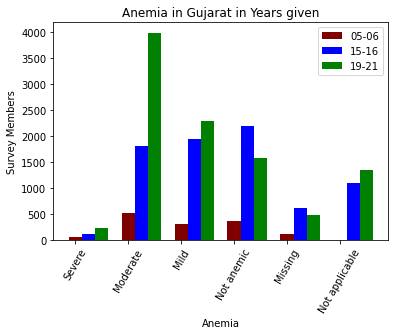

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[10, 114, 127, 395, 236, 0]
[2, 64, 108, 186, 11, 45]
[5, 72, 72, 126, 54, 40]


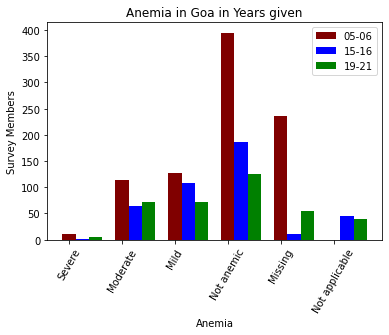

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[18, 190, 196, 362, 93, 0]
[104, 702, 518, 956, 240, 409]
[70, 669, 569, 891, 82, 354]


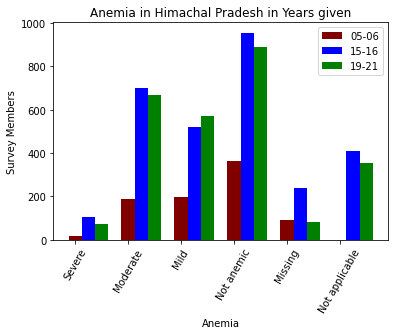

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[42, 431, 255, 273, 80, 0]
[191, 2700, 1834, 1810, 243, 1104]
[183, 2164, 1369, 1533, 589, 1077]


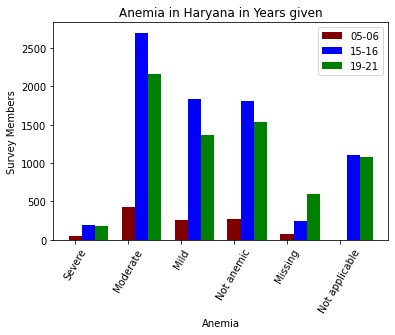

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[24, 475, 353, 383, 163, 0]
[109, 3685, 3208, 2992, 441, 1769]
[78, 2850, 2518, 2383, 601, 1617]


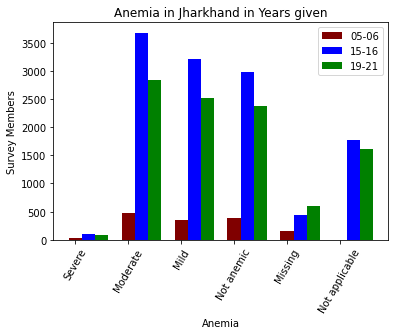

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[20, 269, 228, 358, 183, 0]
[238, 2254, 1494, 2705, 433, 1121]
[0, 0, 0, 0, 0, 0]


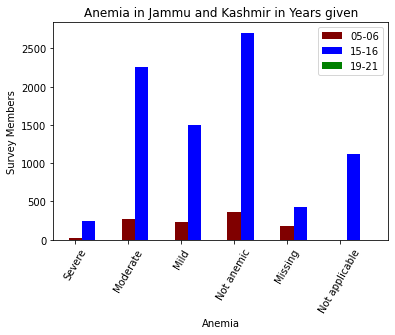

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[39, 505, 383, 381, 559, 0]
[62, 1857, 1899, 2335, 504, 1132]
[188, 2430, 1803, 2214, 572, 1176]


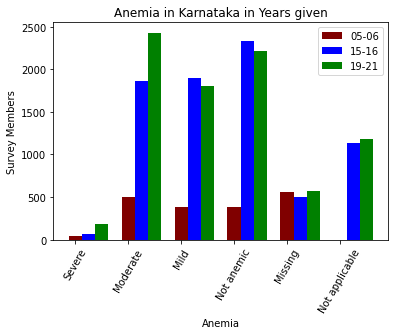

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[4, 164, 188, 442, 123, 0]
[8, 261, 473, 1318, 135, 267]
[16, 322, 522, 1380, 210, 284]


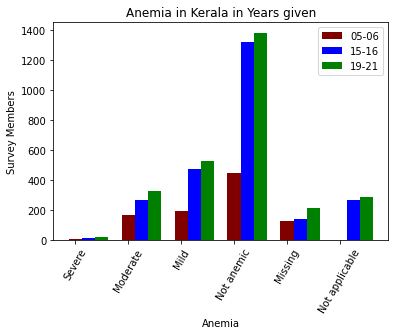

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[6, 226, 224, 256, 196, 0]
[19, 635, 1052, 1794, 379, 530]
[29, 1148, 1396, 2945, 213, 897]


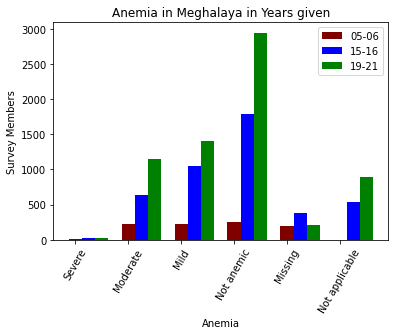

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[36, 728, 486, 764, 603, 0]
[74, 1867, 2145, 3638, 533, 1144]
[218, 3059, 2282, 2192, 622, 1147]


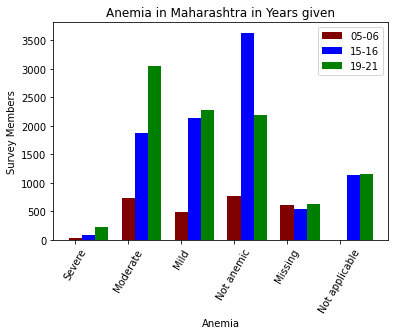

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[5, 220, 370, 838, 207, 0]
[10, 351, 792, 3618, 129, 736]
[13, 476, 673, 1598, 62, 403]


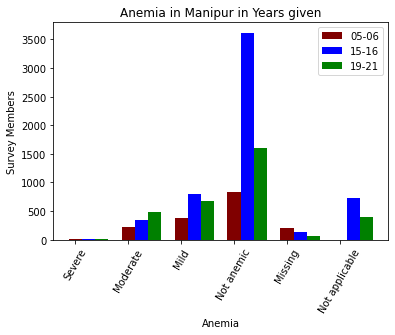

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[77, 989, 655, 745, 55, 0]
[416, 7701, 5898, 6087, 811, 3698]
[375, 5223, 3391, 3193, 1454, 2644]


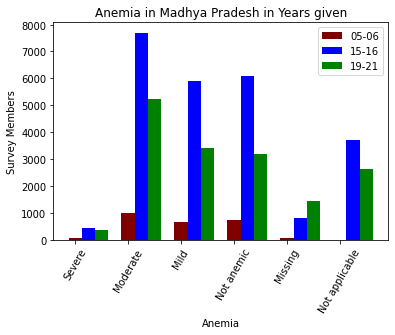

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[5, 145, 169, 395, 25, 0]
[27, 320, 628, 3112, 156, 662]
[10, 436, 554, 1050, 114, 290]


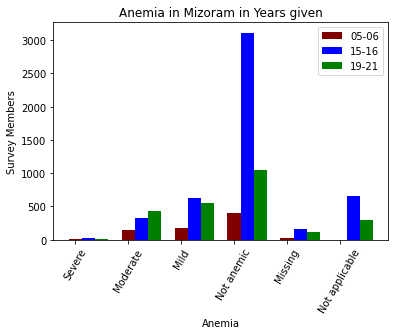

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[0, 0, 0, 0, 0, 0]
[15, 373, 520, 2561, 476, 662]
[17, 441, 678, 1469, 31, 416]


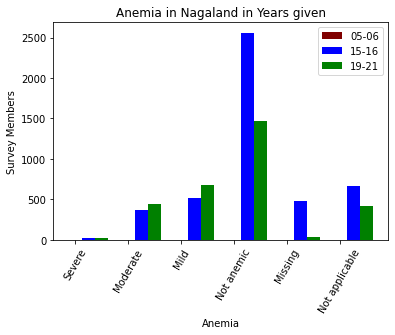

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[22, 448, 398, 484, 121, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


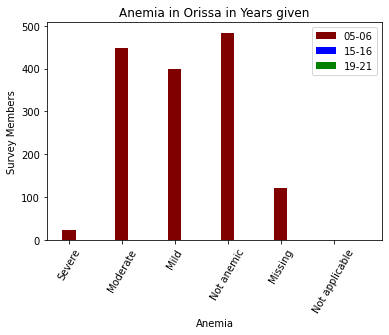

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[63, 376, 214, 333, 102, 0]
[59, 1282, 1203, 1893, 119, 660]
[212, 1681, 1107, 1262, 485, 869]


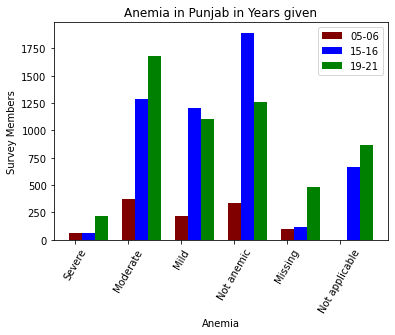

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[104, 640, 366, 470, 47, 0]
[264, 4395, 3788, 5417, 521, 2447]
[224, 4532, 3555, 3256, 691, 2385]


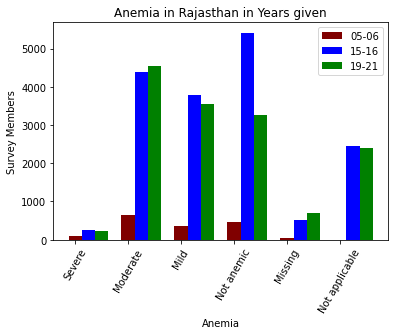

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[2, 146, 145, 201, 61, 0]
[5, 198, 254, 351, 38, 159]
[3, 146, 124, 201, 64, 82]


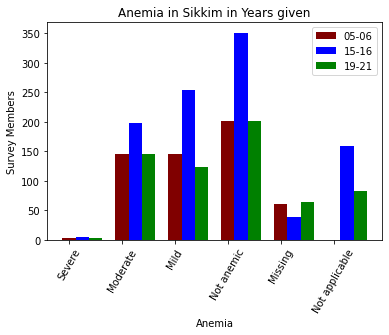

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[37, 499, 360, 498, 120, 0]
[65, 1561, 1835, 3254, 269, 938]
[105, 1545, 1400, 2297, 317, 834]


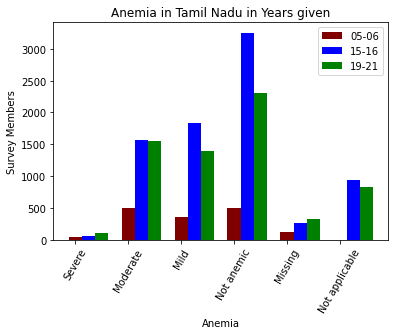

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[4, 178, 144, 188, 17, 0]
[2, 185, 324, 551, 98, 170]
[13, 534, 605, 601, 45, 276]


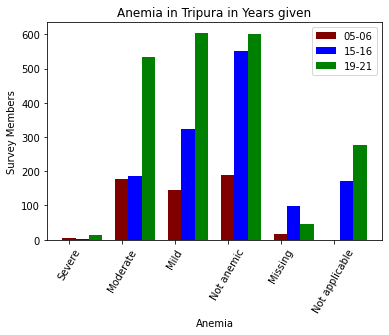

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[20, 271, 254, 338, 153, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


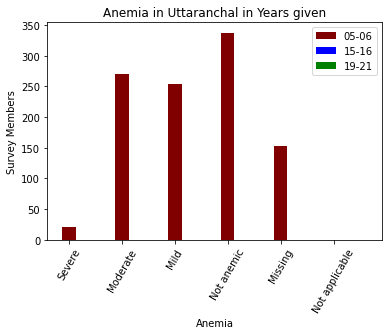

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[165, 2012, 1146, 1233, 1170, 0]
[863, 11712, 8893, 12163, 1290, 6830]
[544, 9893, 7510, 8602, 2999, 6218]


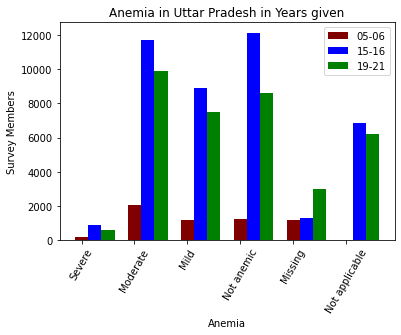

['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
[24, 498, 554, 728, 207, 0]
[22, 1048, 1361, 1944, 302, 651]
[47, 1631, 1619, 1385, 249, 687]


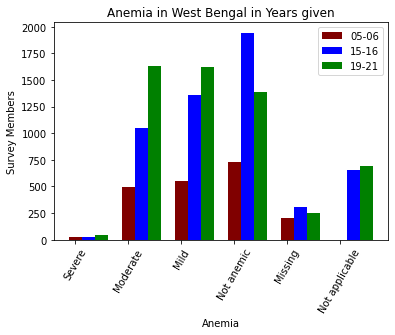

In [ ]:
for state in df_sample['V024'].unique():
    values = ['Severe', 'Moderate', 'Mild', 'Not anemic', 'Missing', 'Not applicable']
    print(values)
    
    #print(df_sample[df_sample['V024']==state]['HW57'].unique())
    list1=[]
    for i in values:
        list1.append(sum(df_sample[df_sample['V024']==state]['HW57']==i))
    print(list1)
    
    #print(df15[df15['V024']==state]['HW57'].unique())
    list2=[]
    for i in values:
        list2.append(sum(df15[df15['V024']==state]['HW57']==i))
    print(list2)
    
    #print(df19[df19['V024']==state]['HW57'].unique())
    list3=[]
    for i in values:
        list3.append(sum(df19[df19['V024']==state]['HW57']==i))
    print(list3)

    barWidth = 0.25
    br1 = np.arange(len(list1))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    
    plt.bar(br1, list1 , color ='maroon',
            width = 0.25, label = '05-06')
    plt.bar(br2, list2 , color ='b',
            width = 0.25, label = '15-16')
    plt.bar(br3, list3 , color ='g',
            width = 0.25, label = '19-21')

    plt.xlabel("Anemia")
    plt.ylabel("Survey Members")
    plt.title("Anemia in "+str(state)+" in Years given")
    locs, labels = plt.xticks(br1, values)
    plt.setp(labels, rotation=60)
    plt.legend()
    plt.show()

#**Data Analysis**

Taking a look at the preprocessed data to start our Analysis

In [13]:
df_prep

,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,V445,...,H1,H3,S549G,B16,V190,V130,V106,B4,V025,HW57
0,28 1 1 4,2.0,0.095670,0.067170,0.593220,2.0,2.0,0.019902,0.0,0.051734,...,2.0,2.0,0.0,6.0,2,1,1,1,2,3.0
1,28 1 6 5,2.0,0.132931,0.074112,0.881356,2.0,2.0,0.451145,2.0,0.095623,...,0.0,2.0,1.0,7.0,3,2,0,1,2,4.0
2,28 1 8 5,1.0,0.073515,0.051245,0.186441,1.0,1.0,0.223422,0.0,0.059693,...,1.0,1.0,0.0,8.0,4,1,2,2,2,4.0
3,28 1 8 5,1.0,0.101712,0.060943,0.389831,1.0,1.0,0.402840,1.0,0.059693,...,1.0,1.0,0.0,7.0,4,1,2,1,2,1.0
4,28 1 10 4,2.0,0.112790,0.066558,0.593220,2.0,2.0,0.346735,2.0,0.076180,...,3.0,2.0,0.0,5.0,3,2,0,1,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51550,19205 6 2,1.0,0.100705,0.070233,0.915254,1.0,1.0,0.029103,1.0,0.063786,...,1.0,1.0,0.0,3.0,1,1,2,2,2,4.0
51551,19205 15 2,1.0,0.100705,0.068702,0.830508,1.0,1.0,0.030603,1.0,0.032973,...,1.0,1.0,0.0,4.0,1,1,1,1,2,2.0
51552,19205 21 4,1.0,0.082578,0.057983,0.423729,1.0,1.0,0.089009,1.0,0.098351,...,1.0,1.0,0.0,5.0,2,1,2,2,2,4.0
51553,19205 26 4,2.0,0.117825,0.074010,0.677966,2.0,2.0,0.091109,2.0,0.124503,...,2.0,2.0,0.0,7.0,3,1,2,1,2,3.0


In [14]:
df_prep_copy = df_prep.copy()

In [16]:
df_prep2 = pd.read_csv("df_prep2.csv")
df_prep2

,Unnamed: 0,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,...,H5,H1,H3,B16,V190,V130,V106,B4,V025,HW57
0,0,01000110 02,1,0.015502,0.100210,0.830508,1,1,0.518852,1,...,1,1,1,3,4,1,2,2,1,4
1,1,01000123 02,1,0.010101,0.083908,0.491525,1,1,0.078208,1,...,1,1,1,3,4,1,3,2,1,4
2,2,01000227 04,0,0.006201,0.065207,0.067797,0,0,0.111211,0,...,0,2,0,6,3,3,2,2,2,
3,3,01000227 04,0,0.012001,0.084608,0.508475,0,0,0.492849,0,...,0,2,0,5,3,3,2,1,2,4
4,4,01000258 02,0,0.007901,0.067907,0.118644,0,0,0.469947,0,...,0,2,0,5,5,3,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259622,259622,36048211 04,1,0.014901,0.093909,0.593220,1,1,0.672667,1,...,1,1,1,5,3,1,2,1,2,4
259623,259623,36048218 02,1,0.009401,0.070307,0.135593,1,1,0.820182,1,...,1,1,1,3,3,1,2,1,2,2
259624,259624,36048261 07,2,0.003200,0.053205,0.033898,0,0,0.057606,0,...,0,1,0,8,4,1,2,1,2,
259625,259625,36048275 02,1,0.011301,0.083508,0.423729,1,1,0.325133,1,...,1,1,1,4,4,1,2,1,2,2


In [17]:
df_prep3 = pd.read_csv("df_prep3.csv")
df_prep3

,Unnamed: 0,CASEID,H2,HW2,HW3,HW1,H6,H4,HW10,H8,...,H5,H1,H3,B16,V190,V130,V106,B4,V025,HW57
0,0,0100101399 02,,0.013101,0.128313,0.864407,,,0.999900,,...,,,,5,3,2,2,1,2,2
1,1,0100101357 02,1,0.011101,0.090009,0.203390,1,1,0.054105,1,...,1,1,1,6,1,2,1,2,2,2
2,2,0100101395 02,1,0.014501,0.102710,0.423729,1,1,0.124012,1,...,1,1,1,3,1,2,2,2,2,2
3,3,0100101358 04,1,0.007801,0.089309,0.220339,1,1,0.999900,1,...,1,1,1,5,3,2,2,1,2,2
4,4,0100101380 02,,0.012701,0.109711,0.661017,,,0.999900,,...,,,,4,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232915,232915,3700401542 04,1,0.009701,0.078308,0.288136,1,1,0.254325,1,...,1,1,1,5,1,2,0,2,1,2
232916,232916,3700401583 04,,0.012101,0.096310,0.813559,,,0.018702,,...,,,,5,4,2,2,1,1,2
232917,232917,3700401546 02,2,0.009801,0.078308,0.203390,2,2,0.169417,0,...,2,2,2,4,4,2,0,1,1,1
232918,232918,3700401554 02,1,0.004200,0.044804,0.016949,0,1,0.999900,0,...,0,1,1,3,4,2,0,2,1,


## Association Rule Mining Analysis

We will be performing Apriori Algorithm to mine the Association Rules from the data.

### Apriori Algorithm

Here all the functions used in the algorithm are listed, analysis is done in the next segment. 

The properties of each function are listed as comment string under each initialization.

In [18]:
def get_init(data):  
    """
    get all the items in the data 

    parameters : data -> pd.Dataframe
    returns : init -> array
    """
    init = []
    for i in data:
        for q in i[1]:
            if(q not in init):
                init.append(q)
    init = sorted(init)
    print(init)
    return init

In [19]:
def get_min_sup(init):
    """
    Minimum Support 
    min_sup

    parameters : init -> array
    returns : min_sup -> int
    """
    sp = 0.4
    min_sup = int(sp*len(init))
    print(min_sup)
    return min_sup

In [20]:
def get_supports(init, data):  
    """
    get supports of all the items in the data

    parameters : init -> array
                 data -> pd.DataFrame
    returns : supports -> dict
    """  
    supports = {}
    for i in init:
        supports[i] = 0
        for d in data:
            if(i in d[1]):
                supports[i]+=1
        supports[i] = supports[i]/len(data)
    print(supports)
    return supports

In [21]:
def apriori(init, data, min_sup):    
    """
    Apriori Algorithm code

    parameters : init -> array
                 data -> pd.DataFrame
                 min_sup -> int
    returns : item_set -> dict
    """
    c = Counter()
    for i in init:
        for d in data:
            if(i in d[1]):
                c[i]+=1
    print("C1:")
    for i in c:
        print(str([i])+": "+str(c[i]))
    print()
    l = Counter()
    for i in c:
        if(c[i] >= min_sup):
            l[frozenset([i])]+=c[i] #frozenset is immutable set
    print("L1:")
    for i in l:
        print(str(list(i))+": "+str(l[i]))
    print()
    item_set = l
    pos = 1
    for count in range (2,1000):
        nc = set()
        temp = list(l)
        for i in range(0,len(temp)):
            for j in range(i+1,len(temp)):
                t = temp[i].union(temp[j])
                if(len(t) == count):
                    nc.add(temp[i].union(temp[j])) #creating itemsets with "n"
        nc = list(nc)
        c = Counter()
        for i in nc:
            c[i] = 0
            for q in data:
                temp = set(q[1])
                if(i.issubset(temp)): #incrementing the counter according to number of occurences 
                    c[i]+=1
        print("C"+str(count)+":")
        for i in c:
            print(str(list(i))+": "+str(c[i]))
        print()
        l = Counter()
        for i in c:
            if(c[i] >= min_sup):
                l[i]+=c[i]
        print("L"+str(count)+":")
        for i in l:
            print(str(list(i))+": "+str(l[i]))
        print()
        if(len(l) == 0):
            break
        item_set = l
        pos = count
    print("Result: ")
    print("L"+str(pos)+":")
    for i in item_set:
        print(str(list(i))+": "+str(item_set[i]))
    print()

    return item_set

In [22]:
def get_association_rules(init, data, supports, item_set, anemic_types, min_conf):    
    """
    get the final association rules along with their confidence and lift values

    parameters : init -> array
                 data -> pd.DataFrame
                 supports -> dict
                 item_set -> dict
    returns : final_rules -> list
    """
    final_rules = []
    for l in item_set:
        c = [frozenset(q) for q in combinations(l,len(l)-1)]
        mmax = 0
        for a in c:
            b = l-a
            ab = l
            support_ab = 0
            support_a = 0
            support_b = 0
            for q in data:
                temp = set(q[1])
                if(a.issubset(temp)):
                    support_a+=1
                if(b.issubset(temp)):
                    support_b+=1
                if(ab.issubset(temp)):
                    support_ab+=1
            temp = support_ab/support_a*100
            if(temp > mmax):
                mmax = temp
            temp = support_ab/support_b*100
            if(temp > mmax):
                mmax = temp
            print(str(list(a))+" -> "+str(list(b))+" conf = "+str(support_ab/support_a*100)+"%"+" lift = "+str((support_ab/support_a)/supports[str(list(b)[0])]))
            print(str(list(b))+" -> "+str(list(a))+" conf = "+str(support_ab/support_b*100)+"%"+" lift = "+str((support_ab/support_b)/supports[str(list(a)[0])]))
        curr = 1
        print("choosing:", end=' ')
        for a in c:
            b = l-a
            ab = l
            support_ab = 0
            support_a = 0
            support_b = 0
            for q in data:
                temp = set(q[1])
                if(a.issubset(temp)):
                    support_a+=1
                if(b.issubset(temp)):
                    support_b+=1
                if(ab.issubset(temp)):
                    support_ab+=1
            temp = support_ab/support_a*100
            if(temp == mmax):
                print(curr, end = ' ')
            if(temp >= min_conf*100):
                if list(b)[0] in anemic_types:
                    final_rules.append(str(list(a))+" -> "+str(list(b))+" conf = "+str(support_ab/support_a*100)+"%"+" lift = "+str((support_ab/support_a)/supports[str(list(b)[0])]))
            curr += 1
            temp = support_ab/support_b*100
            if(temp == mmax):
                print(curr, end = ' ')
            if(temp >= min_conf*100):
                if list(a)[0] in anemic_types:
                    final_rules.append(str(list(b))+" -> "+str(list(a))+" conf = "+str(support_ab/support_b*100)+"%"+" lift = "+str((support_ab/support_b)/supports[str(list(a)[0])]))
            curr += 1
        print()
        print()

    for i in final_rules: 
        print(i)
    return final_rules


### Implementation on our data

Let us apply the apriori algorithm on our data to see how different factors association with Anemia. 

We will be using min_sup and min_conf according to the data to bring out meaningful association rules

Lets find the association rules between Highest educational levels of Mother and Anemia

In [24]:
"""
V106 - Highest educational level of Mother
HW57 - Anemia level
"""
df_test = df_prep[["HW57", "V106"]]
df_test

,HW57,V106
0,3.0,1
1,4.0,0
2,4.0,2
3,1.0,2
4,4.0,0
...,...,...
51550,4.0,2
51551,2.0,1
51552,4.0,2
51553,3.0,2


In [25]:
dict = {1.0:  'Severe',
                               2.0:  'Moderate',
                               3.0:  'Mild',
                               4.0:  'Not anemic',
                               8.0:  'Nagaland: information not collected',
                               9.0:  'Missing',
                           ' ':   'Not applicable',}
          
df_test = df_test.replace({"HW57": dict})
df_test['HW57'].unique()

array(['Mild', 'Not anemic', 'Severe', nan, 'Moderate'], dtype=object)

In [26]:
dict = {0:  'No education',
                               1:  'Primary',
                               2:  'Secondary',
                               3:  'Higher',
                               9:  'Missing',}

df_test = df_test.replace({"V106": dict})
df_test['V106'].unique()

array(['Primary', 'No education', 'Secondary', 'Higher'], dtype=object)

In [ ]:
#df_test.head(100).values

In [27]:
anemic_types = df_test['HW57'].unique()
anemic_types

array(['Mild', 'Not anemic', 'Severe', nan, 'Moderate'], dtype=object)

In [ ]:
count = 1
data = []
for item in df_test.values:
  data.append(['T'+str(count),[x for x in item if str(x) != 'nan']])
  count=count+1
#data

In [ ]:
init = get_init(data)

['Higher', 'Mild', 'Moderate', 'No education', 'Not anemic', 'Primary', 'Secondary', 'Severe']


In [ ]:
min_sup = get_min_sup(init)

3


In [ ]:
supports = get_supports(init, data)

{'Higher': 0.07040716575351809, 'Mild': 0.2132675563234592, 'Moderate': 0.29315479573510356, 'No education': 0.4165776252074477, 'Not anemic': 0.28781230818196285, 'Primary': 0.14754359242503468, 'Secondary': 0.3654716166139996, 'Severe': 0.020801600472866985}


In [ ]:
item_set = apriori(init, data, min_sup)

C1:
['Higher']: 3097
['Mild']: 9381
['Moderate']: 12895
['No education']: 18324
['Not anemic']: 12660
['Primary']: 6490
['Secondary']: 16076
['Severe']: 915

L1:
['Higher']: 3097
['Mild']: 9381
['Moderate']: 12895
['No education']: 18324
['Not anemic']: 12660
['Primary']: 6490
['Secondary']: 16076
['Severe']: 915

C2:
['Mild', 'Moderate']: 0
['Mild', 'Secondary']: 3520
['Higher', 'Severe']: 34
['Primary', 'Moderate']: 1892
['Primary', 'Not anemic']: 1786
['Severe', 'Secondary']: 255
['Higher', 'Primary']: 0
['Severe', 'Moderate']: 0
['Mild', 'No education']: 3841
['No education', 'Moderate']: 6189
['Severe', 'Not anemic']: 0
['No education', 'Secondary']: 0
['Mild', 'Severe']: 0
['No education', 'Not anemic']: 4165
['No education', 'Severe']: 493
['Moderate', 'Not anemic']: 0
['Mild', 'Primary']: 1416
['Moderate', 'Secondary']: 4155
['No education', 'Primary']: 0
['Higher', 'Mild']: 604
['Secondary', 'Not anemic']: 5396
['Higher', 'Secondary']: 0
['Mild', 'Not anemic']: 0
['Higher', 'N

In [ ]:
final_rules = get_association_rules(init, data, supports, item_set, anemic_types, min_conf=0.30)

['Mild'] -> ['Secondary'] conf = 37.52265216927833% lift = 1.0266912795285184
['Secondary'] -> ['Mild'] conf = 21.895994028365266% lift = 1.0266912795285181
['Secondary'] -> ['Mild'] conf = 21.895994028365266% lift = 1.0266912795285181
['Mild'] -> ['Secondary'] conf = 37.52265216927833% lift = 1.0266912795285184
choosing: 1 Secondary
4 Secondary


['Higher'] -> ['Severe'] conf = 1.0978366160800774% lift = 0.5277654560821242
['Severe'] -> ['Higher'] conf = 3.715846994535519% lift = 0.5277654560821242
['Severe'] -> ['Higher'] conf = 3.715846994535519% lift = 0.5277654560821242
['Higher'] -> ['Severe'] conf = 1.0978366160800774% lift = 0.5277654560821242
choosing: 2 3 

['Primary'] -> ['Moderate'] conf = 29.152542372881356% lift = 0.994441939787462
['Moderate'] -> ['Primary'] conf = 14.672353625436216% lift = 0.994441939787462
['Moderate'] -> ['Primary'] conf = 14.672353625436216% lift = 0.994441939787462
['Primary'] -> ['Moderate'] conf = 29.152542372881356% lift = 0.994441939787462
choo

With min_sup as 3 (40% support) and min_confidence as 30%, 

we have got the association rules of,

['No education'] -> ['Moderate'] conf = 33.77537655533726% lift = 1.1521345393870648

['Secondary'] -> ['Not anemic'] conf = 33.565563573028115% lift = 1.1662309991206854

['Higher'] -> ['Not anemic'] conf = 42.39586696803358% lift = 1.4730387048364084


This means that the education level of the mother being **Secondary or Higher education** will most likely imply **No Anemia** in the household, 

whereas **No education** of the mother will likely imply a Moderate levels of Anemia.

In [28]:
"""
V106 - Highest educational level of Mother
HW57 - Anemia level
"""
df_test = df_prep2[["HW57", "V106"]]
df_test

,HW57,V106
0,4,2
1,4,3
2,,2
3,4,2
4,4,2
...,...,...
259622,4,2
259623,2,2
259624,,2
259625,2,2


In [31]:
dict = {'1':  'Severe',
                               '2':  'Moderate',
                               '3':  'Mild',
                               '4':  'Not anemic',
                               '9':  'Missing',
                           ' ':   'Not applicable',}
          
df_test = df_test.replace({"HW57": dict})
df_test['HW57'].unique()

array(['Not anemic', 'Not applicable', 'Moderate', 'Mild', 'Missing',
       'Severe'], dtype=object)

In [32]:
dict = {0:  'No education',
                               1:  'Primary',
                               2:  'Secondary',
                               3:  'Higher',
                               9:  'Missing',}

df_test = df_test.replace({"V106": dict})
df_test['V106'].unique()

array(['Secondary', 'Higher', 'Primary', 'No education'], dtype=object)

In [33]:
count = 1
data = []
for item in df_test.values:
  data.append(['T'+str(count),[x for x in item if str(x) != 'nan']])
  count=count+1
#data

In [36]:
init = get_init(data)
min_sup = get_min_sup(init)
supports = get_supports(init, data)
item_set = apriori(init, data, min_sup)
final_rules = get_association_rules(init, data, supports, item_set, anemic_types, min_conf=0.35)

['Higher', 'Mild', 'Missing', 'Moderate', 'No education', 'Not anemic', 'Not applicable', 'Primary', 'Secondary', 'Severe']
4
{'Higher': 0.09227083469746983, 'Mild': 0.2195611396349378, 'Missing': 0.047618313965804786, 'Moderate': 0.23155141799581708, 'No education': 0.3123211376320645, 'Not anemic': 0.34275325755795816, 'Not applicable': 0.145474083974317, 'Primary': 0.1461250178140178, 'Secondary': 0.4492830098564479, 'Severe': 0.013041786871165171}
C1:
['Higher']: 23956
['Mild']: 57004
['Missing']: 12363
['Moderate']: 60117
['No education']: 81087
['Not anemic']: 88988
['Not applicable']: 37769
['Primary']: 37938
['Secondary']: 116646
['Severe']: 3386

L1:
['Higher']: 23956
['Mild']: 57004
['Missing']: 12363
['Moderate']: 60117
['No education']: 81087
['Not anemic']: 88988
['Not applicable']: 37769
['Primary']: 37938
['Secondary']: 116646
['Severe']: 3386

C2:
['Moderate', 'Not anemic']: 0
['Missing', 'Higher']: 1586
['Severe', 'Not anemic']: 0
['Moderate', 'Not applicable']: 0
['No

['Missing'] -> ['No education'] conf = 26.47415675806843% lift = 0.8476581815367483
['No education'] -> ['Missing'] conf = 4.036405342410005% lift = 0.8476581815367485
choosing: 2 3 

['Moderate'] -> ['Primary'] conf = 14.917577390754694% lift = 1.0208777123805866
['Primary'] -> ['Moderate'] conf = 23.638568190205074% lift = 1.0208777123805866
['Primary'] -> ['Moderate'] conf = 23.638568190205074% lift = 1.0208777123805866
['Moderate'] -> ['Primary'] conf = 14.917577390754694% lift = 1.0208777123805866
choosing: 2 3 

['Secondary'] -> ['Severe'] conf = 1.1642062308180305% lift = 0.8926738661801324
['Severe'] -> ['Secondary'] conf = 40.106320141760186% lift = 0.8926738661801323
['Severe'] -> ['Secondary'] conf = 40.106320141760186% lift = 0.8926738661801323
['Secondary'] -> ['Severe'] conf = 1.1642062308180305% lift = 0.8926738661801324
choosing: 2 3 

['Higher'] -> ['Moderate'] conf = 17.96627149774587% lift = 0.7759085067693442
['Moderate'] -> ['Higher'] conf = 7.15937255684748% lift 

In [44]:
"""
V106 - Highest educational level of Mother
HW57 - Anemia level
"""
df_test = df_prep3[["HW57", "V106"]]
df_test

,HW57,V106
0,2,2
1,2,1
2,2,2
3,2,2
4,2,2
...,...,...
232915,2,0
232916,2,2
232917,1,0
232918,,0


In [45]:
dict = {'1':  'Severe',
                               '2':  'Moderate',
                               '3':  'Mild',
                               '4':  'Not anemic',
                               '9':  'Missing',
                           ' ':   'Not applicable',}
          
df_test = df_test.replace({"HW57": dict})
df_test['HW57'].unique()

array(['Moderate', 'Not anemic', 'Not applicable', 'Mild', 'Severe',
       'Missing'], dtype=object)

In [46]:
dict = {0:  'No education',
                               1:  'Primary',
                               2:  'Secondary',
                               3:  'Higher',
                               9:  'Missing',}

df_test = df_test.replace({"V106": dict})
df_test['V106'].unique()

array(['Secondary', 'Primary', 'No education', 'Higher'], dtype=object)

In [47]:
count = 1
data = []
for item in df_test.values:
  data.append(['T'+str(count),[x for x in item if str(x) != 'nan']])
  count=count+1
#data

In [48]:
init = get_init(data)
min_sup = get_min_sup(init)
supports = get_supports(init, data)
item_set = apriori(init, data, min_sup)
final_rules = get_association_rules(init, data, supports, item_set, anemic_types, min_conf=0.25)

['Higher', 'Mild', 'Missing', 'Moderate', 'No education', 'Not anemic', 'Not applicable', 'Primary', 'Secondary', 'Severe']
4
{'Higher': 0.13637729692598316, 'Mild': 0.22627082260003434, 'Missing': 0.06276833247466941, 'Moderate': 0.28640305684355144, 'No education': 0.21986089644513138, 'Not anemic': 0.2592864502833591, 'Not applicable': 0.14788339343980766, 'Primary': 0.12914734672849046, 'Secondary': 0.514614459900395, 'Severe': 0.01738794435857805}
C1:
['Higher']: 31765
['Mild']: 52703
['Missing']: 14620
['Moderate']: 66709
['No education']: 51210
['Not anemic']: 60393
['Not applicable']: 34445
['Primary']: 30081
['Secondary']: 119864
['Severe']: 4050

L1:
['Higher']: 31765
['Mild']: 52703
['Missing']: 14620
['Moderate']: 66709
['No education']: 51210
['Not anemic']: 60393
['Not applicable']: 34445
['Primary']: 30081
['Secondary']: 119864
['Severe']: 4050

C2:
['Moderate', 'Not anemic']: 0
['Missing', 'Higher']: 2745
['Severe', 'Not anemic']: 0
['Moderate', 'Not applicable']: 0
['N

['Missing'] -> ['No education'] conf = 20.73187414500684% lift = 0.9429541351015414
['No education'] -> ['Missing'] conf = 5.918765866041788% lift = 0.9429541351015414
choosing: 2 3 

['Moderate'] -> ['Primary'] conf = 13.524411998381028% lift = 1.0472078862613974
['Primary'] -> ['Moderate'] conf = 29.992353977593826% lift = 1.0472078862613972
['Primary'] -> ['Moderate'] conf = 29.992353977593826% lift = 1.0472078862613972
['Moderate'] -> ['Primary'] conf = 13.524411998381028% lift = 1.0472078862613974
choosing: 2 3 

['Secondary'] -> ['Severe'] conf = 1.6944203430554627% lift = 0.9744799661838973
['Severe'] -> ['Secondary'] conf = 50.14814814814815% lift = 0.9744799661838973
['Severe'] -> ['Secondary'] conf = 50.14814814814815% lift = 0.9744799661838973
['Secondary'] -> ['Severe'] conf = 1.6944203430554627% lift = 0.9744799661838973
choosing: 2 3 

['Higher'] -> ['Moderate'] conf = 24.227923815520228% lift = 0.8459380316165692
['Moderate'] -> ['Higher'] conf = 11.536674211875459% lift

In [54]:
"""
B4 - Gender of child
B16 - Child's line number in household
HW57 - Anemia level
"""
df_test1 = df_prep[["HW57", "B4", "B16"]]
df_test1

,HW57,B4,B16
0,3.0,1,6.0
1,4.0,1,7.0
2,4.0,2,8.0
3,1.0,1,7.0
4,4.0,1,5.0
...,...,...,...
51550,4.0,2,3.0
51551,2.0,1,4.0
51552,4.0,2,5.0
51553,3.0,1,7.0


In [55]:
dict = {1.0:  'Severe',
                               2.0:  'Moderate',
                               3.0:  'Mild',
                               4.0:  'Not anemic',
                               8.0:  'Nagaland: information not collected',
                               9.0:  'Missing',
                           ' ':   'Not applicable',}
          
df_test1 = df_test1.replace({"HW57": dict})
df_test1['HW57'].unique()

array(['Mild', 'Not anemic', 'Severe', nan, 'Moderate'], dtype=object)

In [56]:
dict = {1:  'Male',                 
                               2:  'Female',
                           ' ':   'Not applicable',}

df_test1 = df_test1.replace({"B4": dict})
df_test1['B4'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
count = 1
data = []
for item in df_test1.values:
  data.append(['T'+str(count),[x for x in item if str(x) != 'nan']])
  count=count+1

In [35]:
init = get_init(data)
min_sup = get_min_sup(init)
supports = get_supports(init, data)
item_set = apriori(init, data, min_sup)
final_rules = get_association_rules(init, data, supports, item_set, anemic_types, min_conf=0.35)

['Higher', 'Mild', 'Missing', 'Moderate', 'No education', 'Not anemic', 'Not applicable', 'Primary', 'Secondary', 'Severe']
4
{'Higher': 0.09227083469746983, 'Mild': 0.2195611396349378, 'Missing': 0.047618313965804786, 'Moderate': 0.23155141799581708, 'No education': 0.3123211376320645, 'Not anemic': 0.34275325755795816, 'Not applicable': 0.145474083974317, 'Primary': 0.1461250178140178, 'Secondary': 0.4492830098564479, 'Severe': 0.013041786871165171}
C1:
['Higher']: 23956
['Mild']: 57004
['Missing']: 12363
['Moderate']: 60117
['No education']: 81087
['Not anemic']: 88988
['Not applicable']: 37769
['Primary']: 37938
['Secondary']: 116646
['Severe']: 3386

L1:
['Higher']: 23956
['Mild']: 57004
['Missing']: 12363
['Moderate']: 60117
['No education']: 81087
['Not anemic']: 88988
['Not applicable']: 37769
['Primary']: 37938
['Secondary']: 116646
['Severe']: 3386

C2:
['Moderate', 'Not anemic']: 0
['Missing', 'Higher']: 1586
['Severe', 'Not anemic']: 0
['Moderate', 'Not applicable']: 0
['No

['Missing'] -> ['No education'] conf = 26.47415675806843% lift = 0.8476581815367483
['No education'] -> ['Missing'] conf = 4.036405342410005% lift = 0.8476581815367485
choosing: 2 3 

['Moderate'] -> ['Primary'] conf = 14.917577390754694% lift = 1.0208777123805866
['Primary'] -> ['Moderate'] conf = 23.638568190205074% lift = 1.0208777123805866
['Primary'] -> ['Moderate'] conf = 23.638568190205074% lift = 1.0208777123805866
['Moderate'] -> ['Primary'] conf = 14.917577390754694% lift = 1.0208777123805866
choosing: 2 3 

['Secondary'] -> ['Severe'] conf = 1.1642062308180305% lift = 0.8926738661801324
['Severe'] -> ['Secondary'] conf = 40.106320141760186% lift = 0.8926738661801323
['Severe'] -> ['Secondary'] conf = 40.106320141760186% lift = 0.8926738661801323
['Secondary'] -> ['Severe'] conf = 1.1642062308180305% lift = 0.8926738661801324
choosing: 2 3 

['Higher'] -> ['Moderate'] conf = 17.96627149774587% lift = 0.7759085067693442
['Moderate'] -> ['Higher'] conf = 7.15937255684748% lift 

In [ ]:
"""
V190 - Wealth Index
V025 - Type of Residence
V106 - Highest educational level of Mother
HW57 - Anemia level
"""
df_test2 = df_prep[["HW57", "V025", "V190", "V106"]]
df_test2

,HW57,V025,V190,V106
0,3.0,2,2,1
1,4.0,2,3,0
2,4.0,2,4,2
3,1.0,2,4,2
4,4.0,2,3,0
...,...,...,...,...
51550,4.0,2,1,2
51551,2.0,2,1,1
51552,4.0,2,2,2
51553,3.0,2,3,2


In [ ]:
dict = {1.0:  'Severe',
                               2.0:  'Moderate',
                               3.0:  'Mild',
                               4.0:  'Not anemic',
                               8.0:  'Nagaland: information not collected',
                               9.0:  'Missing',
                           ' ':   'Not applicable',}
          
df_test2 = df_test2.replace({"HW57": dict})
df_test2['HW57'].unique()

array(['Mild', 'Not anemic', 'Severe', nan, 'Moderate'], dtype=object)

In [ ]:
dict = {1.0:  'Urban',
                               2.0:  'Rural',}
          
df_test2 = df_test2.replace({"V025": dict})
df_test2['V025'].unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
dict = {1.0:  'Poorest',
                               2.0:  'Poorer',
                               3.0:  'Middle',
                               4.0:  'Richer',
                               5.0:  'Richest',
                           ' ':   'Not applicable',}
          
df_test2 = df_test2.replace({"V190": dict})
df_test2['V190'].unique()

array(['Poorer', 'Middle', 'Richer', 'Richest', 'Poorest'], dtype=object)

In [ ]:
dict = {0:  'No education',
                               1:  'Primary',
                               2:  'Secondary',
                               3:  'Higher',
                               9:  'Missing',}

df_test2 = df_test2.replace({"V106": dict})
df_test2['V106'].unique()

array(['Primary', 'No education', 'Secondary', 'Higher'], dtype=object)

In [ ]:
count = 1
data = []
for item in df_test2.values:
  data.append(['T'+str(count),[x for x in item if str(x) != 'nan']])
  count=count+1

In [ ]:
init = get_init(data)
min_sup = get_min_sup(init)
supports = get_supports(init, data)
item_set = apriori(init, data, min_sup)
final_rules = get_association_rules(init, data, supports, item_set, anemic_types, min_conf=0.35)

['Higher', 'Middle', 'Mild', 'Moderate', 'No education', 'Not anemic', 'Poorer', 'Poorest', 'Primary', 'Richer', 'Richest', 'Rural', 'Secondary', 'Severe', 'Urban']
6
{'Higher': 0.07040716575351809, 'Middle': 0.2070157091868052, 'Mild': 0.2132675563234592, 'Moderate': 0.29315479573510356, 'No education': 0.4165776252074477, 'Not anemic': 0.28781230818196285, 'Poorer': 0.18803282788096484, 'Poorest': 0.18741901016209334, 'Primary': 0.14754359242503468, 'Richer': 0.2160411030531748, 'Richest': 0.20149134971696184, 'Rural': 0.6411212403664719, 'Secondary': 0.3654716166139996, 'Severe': 0.020801600472866985, 'Urban': 0.3588787596335281}
C1:
['Higher']: 3097
['Middle']: 9106
['Mild']: 9381
['Moderate']: 12895
['No education']: 18324
['Not anemic']: 12660
['Poorer']: 8271
['Poorest']: 8244
['Primary']: 6490
['Richer']: 9503
['Richest']: 8863
['Rural']: 28201
['Secondary']: 16076
['Severe']: 915
['Urban']: 15786

L1:
['Higher']: 3097
['Middle']: 9106
['Mild']: 9381
['Moderate']: 12895
['No ed

['No education', 'Richest', 'Rural'] -> ['Not anemic'] conf = 36.68639053254438% lift = 1.2746637127606868

['Higher', 'Richest', 'Urban'] -> ['Not anemic'] conf = 43.66197183098591% lift = 1.517029348285606

['Rural', 'Richest', 'Secondary'] -> ['Not anemic'] conf = 37.69946808510639% lift = 1.3098629562871837

['Higher', 'Urban', 'Middle'] -> ['Not anemic'] conf = 37.5% lift = 1.3029324644549762

['Richest', 'Primary', 'Rural'] -> ['Not anemic'] conf = 46.42857142857143% lift = 1.6131544798013993

['Higher', 'Richest', 'Rural'] -> ['Not anemic'] conf = 41.14942528735632% lift = 1.4297312560149626

['Richest', 'Urban', 'Secondary'] -> ['Not anemic'] conf = 39.87086359967716% lift = 1.3853078018633485

['Higher', 'Rural', 'Middle'] -> ['Not anemic'] conf = 39.130434782608695% lift = 1.3595817020399754

So for a condition of Not Anemic in the household, 

Being from Rural background, 

*   Rich and No education
*   Rich and Secondary education
*   Rich and Primary education
*   Rich and Higher education
*   Middle wealth and Higher education

Being from Urban background, 

*   Rich and Higher education
*   Rich and Secondary education
*   Middle wealth and Higher education

This means that, 

Being **Rich** in the **Rural** background and being **(Rich + having secondary or greater education of mother)** in the **Urban** background, can imply getting **Not Anemic** conditions in the household.

Futhermore, 

Having **Higher education** levels of mother and **Middle Wealth** will imply No Anemia in both **Rural and Urban**.



['Poorest', 'Urban', 'Secondary'] -> ['Moderate'] conf = 45.45454545454545% lift = 1.5505305086538121

['Higher', 'Poorer', 'Rural'] -> ['Moderate'] conf = 38.88888888888889% lift = 1.3265649907371504

['No education', 'Poorest', 'Rural'] -> ['Moderate'] conf = 36.23636659612568% lift = 1.2360830224612485

So for a condition of Moderate Anemia levels,

Being from rural background, 

*   Poor and Higher education
*   Poorest and Secondary education
*   Poorest and No education

This means that, 

In the **Rural** household, being **Poorest with Secondary or even No-education** levels of mother, or being **Poor with Higher education** levels both imply Moderate levels of Anemia in the household.

In [57]:
"""
V190 - Wealth Index
V025 - Type of Residence
V106 - Highest educational level of Mother
HW57 - Anemia level
"""
df_test2 = df_prep2[["HW57", "V025", "V190", "V106"]]
df_test2

,HW57,V025,V190,V106
0,4,1,4,2
1,4,1,4,3
2,,2,3,2
3,4,2,3,2
4,4,2,5,2
...,...,...,...,...
259622,4,2,3,2
259623,2,2,3,2
259624,,2,4,2
259625,2,2,4,2


In [61]:
dict = {'1':  'Severe',
                               '2':  'Moderate',
                               '3':  'Mild',
                               '4':  'Not anemic',
                               '9':  'Missing',
                           ' ':   'Not applicable',}
          
df_test2 = df_test2.replace({"HW57": dict})
print(df_test2['HW57'].unique())

dict = {1.0:  'Urban',
                               2.0:  'Rural',}
          
df_test2 = df_test2.replace({"V025": dict})
print(df_test2['V025'].unique())

dict = {1.0:  'Poorest',
                               2.0:  'Poorer',
                               3.0:  'Middle',
                               4.0:  'Richer',
                               5.0:  'Richest',
                           ' ':   'Not applicable',}
          
df_test2 = df_test2.replace({"V190": dict})
print(df_test2['V190'].unique())

dict = {0:  'No education',
                               1:  'Primary',
                               2:  'Secondary',
                               3:  'Higher',
                               9:  'Missing',}

df_test2 = df_test2.replace({"V106": dict})
print(df_test2['V106'].unique())

['Not anemic' 'Not applicable' 'Moderate' 'Mild' 'Missing' 'Severe']
['Urban' 'Rural']
['Richer' 'Middle' 'Richest' 'Poorer' 'Poorest']
['Secondary' 'Higher' 'Primary' 'No education']


In [62]:
count = 1
data = []
for item in df_test2.values:
  data.append(['T'+str(count),[x for x in item if str(x) != 'nan']])
  count=count+1

In [63]:
init = get_init(data)
min_sup = get_min_sup(init)
supports = get_supports(init, data)
item_set = apriori(init, data, min_sup)
final_rules = get_association_rules(init, data, supports, item_set, anemic_types, min_conf=0.35)

['Higher', 'Middle', 'Mild', 'Missing', 'Moderate', 'No education', 'Not anemic', 'Not applicable', 'Poorer', 'Poorest', 'Primary', 'Richer', 'Richest', 'Rural', 'Secondary', 'Severe', 'Urban']
6
{'Higher': 0.09227083469746983, 'Middle': 0.1993706355656384, 'Mild': 0.2195611396349378, 'Missing': 0.047618313965804786, 'Moderate': 0.23155141799581708, 'No education': 0.3123211376320645, 'Not anemic': 0.34275325755795816, 'Not applicable': 0.145474083974317, 'Poorer': 0.23663178328910323, 'Poorest': 0.26459497663956366, 'Primary': 0.1461250178140178, 'Richer': 0.16541422887450072, 'Richest': 0.13398837563119398, 'Rural': 0.7635877624438137, 'Secondary': 0.4492830098564479, 'Severe': 0.013041786871165171, 'Urban': 0.23641223755618637}
C1:
['Higher']: 23956
['Middle']: 51762
['Mild']: 57004
['Missing']: 12363
['Moderate']: 60117
['No education']: 81087
['Not anemic']: 88988
['Not applicable']: 37769
['Poorer']: 61436
['Poorest']: 68696
['Primary']: 37938
['Richer']: 42946
['Richest']: 34787

C3:
['Richer', 'Higher', 'Moderate']: 1084
['Secondary', 'Urban', 'Not applicable']: 4150
['Secondary', 'Moderate', 'Not applicable']: 0
['Urban', 'Rural', 'Not anemic']: 0
['Missing', 'Poorer', 'Not applicable']: 0
['Poorer', 'Poorest', 'Not applicable']: 0
['Higher', 'Secondary', 'Not applicable']: 0
['Richer', 'Moderate', 'Severe']: 0
['Secondary', 'Mild', 'Severe']: 0
['Richest', 'No education', 'Secondary']: 0
['Richer', 'No education', 'Secondary']: 0
['Higher', 'Rural', 'Severe']: 126
['Middle', 'Moderate', 'Not anemic']: 0
['Missing', 'Rural', 'Not anemic']: 0
['Mild', 'Rural', 'Not applicable']: 0
['Middle', 'Moderate', 'Not applicable']: 0
['No education', 'Middle', 'Rural']: 7733
['No education', 'Missing', 'Moderate']: 0
['Missing', 'Rural', 'Not applicable']: 0
['Mild', 'Rural', 'Not anemic']: 0
['Poorer', 'Middle', 'Not applicable']: 0
['Richest', 'Middle', 'Secondary']: 0
['Moderate', 'Urban', 'Not anemic']: 0
['Richest', 'Middle', 'Not anemic']: 0
['Middle', 'Primary', 

C4:
['Poorest', 'Not anemic', 'Missing', 'Rural']: 0
['No education', 'Richest', 'Missing', 'Primary']: 0
['Richest', 'Missing', 'Middle', 'Rural']: 0
['Richer', 'No education', 'Poorest', 'Not anemic']: 0
['No education', 'Poorest', 'Middle', 'Rural']: 0
['Mild', 'Middle', 'Urban', 'Primary']: 434
['No education', 'Urban', 'Mild', 'Rural']: 0
['Richer', 'Not applicable', 'Richest', 'Secondary']: 0
['Primary', 'Poorer', 'Higher', 'Mild']: 0
['Urban', 'Primary', 'Secondary', 'Mild']: 0
['Moderate', 'Not applicable', 'Higher', 'Middle']: 0
['No education', 'Poorest', 'Not applicable', 'Missing']: 0
['Urban', 'Moderate', 'Not applicable', 'Higher']: 0
['Richer', 'Middle', 'Urban', 'Mild']: 0
['Middle', 'Missing', 'Urban', 'Primary']: 109
['No education', 'Missing', 'Urban', 'Rural']: 0
['Richest', 'Middle', 'Mild', 'Rural']: 0
['No education', 'Primary', 'Richest', 'Mild']: 0
['Urban', 'Secondary', 'Mild', 'Severe']: 0
['Richer', 'Poorer', 'Higher', 'Severe']: 0
['Richer', 'Not applicable

C5:
['Poorer', 'Urban', 'Mild', 'Not anemic', 'Secondary']: 0
['Not applicable', 'Poorer', 'Middle', 'Rural', 'Secondary']: 0
['Middle', 'Urban', 'Primary', 'Moderate', 'Severe']: 0
['Rural', 'No education', 'Richest', 'Higher', 'Severe']: 0
['Missing', 'Rural', 'Not anemic', 'Richest', 'Higher']: 0
['Richer', 'Urban', 'Not anemic', 'Richest', 'Higher']: 0
['Moderate', 'Not applicable', 'Middle', 'Urban', 'Secondary']: 0
['Middle', 'Mild', 'Rural', 'No education', 'Higher']: 0
['Poorer', 'Rural', 'Not anemic', 'Richest', 'Higher']: 0
['Poorer', 'Mild', 'Rural', 'No education', 'Richest']: 0
['Missing', 'Middle', 'Rural', 'No education', 'Higher']: 0
['Richer', 'Moderate', 'Rural', 'Secondary', 'Severe']: 0
['Poorest', 'Missing', 'Urban', 'No education', 'Richest']: 0
['Mild', 'Rural', 'No education', 'Richest', 'Moderate']: 0
['Richer', 'Not applicable', 'Urban', 'Higher', 'Secondary']: 0
['Urban', 'Middle', 'Mild', 'Primary', 'Higher']: 0
['Richer', 'Not applicable', 'Urban', 'Primary

['Urban', 'Middle', 'Mild'] -> ['Primary'] conf = 17.353058776489405% lift = 1.1875487877493844
['Primary'] -> ['Urban', 'Middle', 'Mild'] conf = 1.1439717433707628% lift = 0.0483888547900945
['Middle', 'Mild', 'Primary'] -> ['Urban'] conf = 24.46448703494927% lift = 1.0348232091469025
['Urban'] -> ['Middle', 'Mild', 'Primary'] conf = 0.7070822268202479% lift = 0.03546571564133158
['Urban', 'Mild', 'Primary'] -> ['Middle'] conf = 29.088471849865954% lift = 1.4590148527810263
['Middle'] -> ['Urban', 'Mild', 'Primary'] conf = 0.8384529191298636% lift = 0.03546571564133158
['Middle', 'Urban', 'Primary'] -> ['Mild'] conf = 21.656686626746506% lift = 0.9863624620802602
['Mild'] -> ['Middle', 'Urban', 'Primary'] conf = 0.7613500806960916% lift = 0.038187673853576784
choosing: 5 

['Missing', 'Middle', 'Urban'] -> ['Primary'] conf = 17.44% lift = 1.1934985713532607
['Primary'] -> ['Missing', 'Middle', 'Urban'] conf = 0.2873108756392008% lift = 0.060336213467264255
['Missing', 'Middle', 'Prima

choosing: 1 

['Secondary', 'Poorest', 'Rural'] -> ['Severe'] conf = 0.962623148078514% lift = 0.7381067928711765
['Severe'] -> ['Secondary', 'Poorest', 'Rural'] conf = 3.780271707028943% lift = 0.08414009931594768
['Poorest', 'Rural', 'Severe'] -> ['Secondary'] conf = 16.161616161616163% lift = 0.3597201720755036
['Secondary'] -> ['Poorest', 'Rural', 'Severe'] conf = 0.10973372425972601% lift = 0.0041472338459851935
['Secondary', 'Rural', 'Severe'] -> ['Poorest'] conf = 13.264248704663212% lift = 0.5013038748173978
['Poorest'] -> ['Secondary', 'Rural', 'Severe'] conf = 0.186328170490276% lift = 0.004147233845985193
['Secondary', 'Poorest', 'Severe'] -> ['Rural'] conf = 95.52238805970148% lift = 1.2509680322008856
['Rural'] -> ['Secondary', 'Poorest', 'Severe'] conf = 0.06456559460877286% lift = 0.0014370807084247955
choosing: 7 

['Richer', 'Primary', 'Not applicable'] -> ['Rural'] conf = 54.14462081128748% lift = 0.709081830201169
['Rural'] -> ['Richer', 'Primary', 'Not applicable'] 

choosing: 1 

['Poorer', 'Secondary', 'Urban'] -> ['Moderate'] conf = 20.91713596138375% lift = 0.9033473490437278
['Moderate'] -> ['Poorer', 'Secondary', 'Urban'] conf = 0.8649799557529484% lift = 0.03655383667105129
['Secondary', 'Urban', 'Moderate'] -> ['Poorer'] conf = 7.896735003796507% lift = 0.33371404694815343
['Poorer'] -> ['Secondary', 'Urban', 'Moderate'] conf = 0.8464092714369426% lift = 0.018839111492495165
['Poorer', 'Secondary', 'Moderate'] -> ['Urban'] conf = 9.683426443202979% lift = 0.4095992044786425
['Urban'] -> ['Poorer', 'Secondary', 'Moderate'] conf = 0.8471952948076703% lift = 0.03580226134595856
['Poorer', 'Urban', 'Moderate'] -> ['Secondary'] conf = 33.31197950032031% lift = 0.74144756800316
['Secondary'] -> ['Poorer', 'Urban', 'Moderate'] conf = 0.44579325480513693% lift = 0.01883911149249516
choosing: 7 

['Richer', 'Higher', 'Not anemic'] -> ['Rural'] conf = 57.82227784730913% lift = 0.7572446900177217
['Rural'] -> ['Richer', 'Higher', 'Not anemic'] conf = 

choosing: 1 

['Richer', 'Higher', 'Severe'] -> ['Rural'] conf = 71.69811320754717% lift = 0.9389636232262544
['Rural'] -> ['Richer', 'Higher', 'Severe'] conf = 0.019167910899479442% lift = 0.0011587824717317443
['Richer', 'Rural', 'Severe'] -> ['Higher'] conf = 13.013698630136986% lift = 1.4103805035258705
['Higher'] -> ['Richer', 'Rural', 'Severe'] conf = 0.1586241442644849% lift = 0.009589510246112657
['Richer', 'Higher', 'Rural'] -> ['Severe'] conf = 1.0626398210290828% lift = 0.8147961866932005
['Severe'] -> ['Richer', 'Higher', 'Rural'] conf = 1.1222681630242175% lift = 0.06784592659653717
['Rural', 'Higher', 'Severe'] -> ['Richer'] conf = 30.158730158730158% lift = 1.823224662348213
['Richer'] -> ['Rural', 'Higher', 'Severe'] conf = 0.08848321147487542% lift = 0.001158782471731744
choosing: 1 

['Richest', 'Higher', 'Severe'] -> ['Rural'] conf = 32.743362831858406% lift = 0.42880942364850605
['Rural'] -> ['Richest', 'Higher', 'Severe'] conf = 0.0186634921915984% lift = 0.0013929

choosing: 3 

['Richer', 'Missing', 'Primary'] -> ['Rural'] conf = 49.18918918918919% lift = 0.6441851429331757
['Rural'] -> ['Richer', 'Missing', 'Primary'] conf = 0.04590210241717445% lift = 0.0027749790770418086
['Richer', 'Missing', 'Rural'] -> ['Primary'] conf = 7.55813953488372% lift = 0.5172378862942844
['Primary'] -> ['Richer', 'Missing', 'Rural'] conf = 0.23986504296483738% lift = 0.014500871212646541
['Richer', 'Primary', 'Rural'] -> ['Missing'] conf = 3.900557222460351% lift = 0.8191296368160751
['Missing'] -> ['Richer', 'Primary', 'Rural'] conf = 0.7360672975814931% lift = 0.04449842692432132
['Missing', 'Primary', 'Rural'] -> ['Richer'] conf = 6.72579453067258% lift = 0.4066031426942975
['Richer'] -> ['Missing', 'Primary', 'Rural'] conf = 0.21189400642667536% lift = 0.04449842692432132
choosing: 1 

['Richer', 'Secondary', 'Rural'] -> ['Severe'] conf = 1.1426073926073925% lift = 0.876112609333962
['Severe'] -> ['Richer', 'Secondary', 'Rural'] conf = 5.404607206142941% lift

['Secondary', 'Urban', 'Not applicable'] -> ['Poorest'] conf = 2.6506024096385543% lift = 0.10017584019553234
['Poorest'] -> ['Secondary', 'Urban', 'Not applicable'] conf = 0.16012577151508092% lift = 0.0035640290863935254
choosing: 1 

['Poorer', 'Urban', 'Moderate'] -> ['Primary'] conf = 20.755925688661115% lift = 1.4204224573699245
['Primary'] -> ['Poorer', 'Urban', 'Moderate'] conf = 0.8540249881385418% lift = 0.03609088247858669
['Poorer', 'Urban', 'Primary'] -> ['Moderate'] conf = 25.59241706161137% lift = 1.1052584900202898
['Moderate'] -> ['Poorer', 'Urban', 'Primary'] conf = 0.5389490493537602% lift = 0.022775852079655035
['Urban', 'Primary', 'Moderate'] -> ['Poorer'] conf = 17.802197802197803% lift = 0.7523164282816603
['Poorer'] -> ['Urban', 'Primary', 'Moderate'] conf = 0.5273780845107103% lift = 0.022307562838635723
['Poorer', 'Moderate', 'Primary'] -> ['Urban'] conf = 11.829134720700987% lift = 0.5003605076869019
['Urban'] -> ['Poorer', 'Moderate', 'Primary'] conf = 0.527

choosing: 1 

['Poorer', 'Urban', 'Not anemic'] -> ['Secondary'] conf = 42.87722586691659% lift = 0.9543478147686122
['Secondary'] -> ['Poorer', 'Urban', 'Not anemic'] conf = 0.7844246695128851% lift = 0.033149590414678985
['Secondary', 'Urban', 'Not anemic'] -> ['Poorer'] conf = 7.551374102500619% lift = 0.319119181605236
['Poorer'] -> ['Secondary', 'Urban', 'Not anemic'] conf = 1.489354775701543% lift = 0.033149590414678985
['Secondary', 'Poorer', 'Urban'] -> ['Not anemic'] conf = 36.80611423974256% lift = 1.0738370366478223
['Not anemic'] -> ['Secondary', 'Poorer', 'Urban'] conf = 1.0282285251944083% lift = 0.02288598728723219
['Poorer', 'Secondary', 'Not anemic'] -> ['Urban'] conf = 9.513412351840298% lift = 0.4024077793172325
['Urban'] -> ['Poorer', 'Secondary', 'Not anemic'] conf = 1.490737874517343% lift = 0.06299820986836939
choosing: 1 

['Richest', 'Urban', 'Moderate'] -> ['Higher'] conf = 35.53798226695423% lift = 3.851485941735902
['Higher'] -> ['Richest', 'Urban', 'Moderat

choosing: 7 

['Poorer', 'Primary', 'Not applicable'] -> ['Rural'] conf = 89.89071038251366% lift = 1.1772151781849438
['Rural'] -> ['Poorer', 'Primary', 'Not applicable'] conf = 0.8297687744643073% lift = 0.035065820953161776
['Poorer', 'Rural', 'Not applicable'] -> ['Primary'] conf = 19.343838193791157% lift = 1.3237868835308706
['Primary'] -> ['Poorer', 'Rural', 'Not applicable'] conf = 4.336021930518214% lift = 0.18323920270763921
['Primary', 'Rural', 'Not applicable'] -> ['Poorer'] conf = 35.13455788124733% lift = 1.484777631850153
['Poorer'] -> ['Primary', 'Rural', 'Not applicable'] conf = 2.67758317598802% lift = 0.18323920270763924
['Poorer', 'Primary', 'Rural'] -> ['Not applicable'] conf = 15.115317467610033% lift = 1.039038504636922
['Not applicable'] -> ['Poorer', 'Primary', 'Rural'] conf = 4.355423760226641% lift = 0.1840591191803441
choosing: 1 

['Richer', 'Urban', 'Primary'] -> ['Severe'] conf = 2.1800947867298577% lift = 1.6716227678508944
['Severe'] -> ['Richer', 'Urba

choosing: 1 

['Richest', 'Urban', 'Not applicable'] -> ['Primary'] conf = 4.39806187103988% lift = 0.3009793898973249
['Primary'] -> ['Richest', 'Urban', 'Not applicable'] conf = 0.31103379197638253% lift = 0.023213490760758983
['Richest', 'Primary', 'Not applicable'] -> ['Urban'] conf = 59.89847715736041% lift = 2.5336453720220287
['Urban'] -> ['Richest', 'Primary', 'Not applicable'] conf = 0.19224816305250983% lift = 0.014348122525320944
['Urban', 'Primary', 'Not applicable'] -> ['Richest'] conf = 13.067552602436322% lift = 0.9752750968789303
['Richest'] -> ['Urban', 'Primary', 'Not applicable'] conf = 0.33920717509414433% lift = 0.014348122525320943
['Richest', 'Urban', 'Primary'] -> ['Not applicable'] conf = 12.394957983193278% lift = 0.8520389092384022
['Not applicable'] -> ['Richest', 'Urban', 'Primary'] conf = 0.3124255341682332% lift = 0.023317361129012528
choosing: 3 

['Richer', 'Urban', 'Not applicable'] -> ['Primary'] conf = 11.226252158894647% lift = 0.7682635271383152
['

choosing: 3 

['Missing', 'Middle', 'Primary'] -> ['Rural'] conf = 71.08753315649867% lift = 0.9309674231680662
['Rural'] -> ['Missing', 'Middle', 'Primary'] conf = 0.13518421371211817% lift = 0.028389122262748607
['Missing', 'Middle', 'Rural'] -> ['Primary'] conf = 14.240170031880977% lift = 0.9745196438576527
['Primary'] -> ['Missing', 'Middle', 'Rural'] conf = 0.7064157309294111% lift = 0.1483495890754754
['Missing', 'Primary', 'Rural'] -> ['Middle'] conf = 19.807834441980784% lift = 0.9935181470322139
['Middle'] -> ['Missing', 'Primary', 'Rural'] conf = 0.5177543371585333% lift = 0.10873008597707556
['Middle', 'Primary', 'Rural'] -> ['Missing'] conf = 4.462204462204462% lift = 0.9370773743498811
['Missing'] -> ['Middle', 'Primary', 'Rural'] conf = 2.1677586346356064% lift = 0.10873008597707558
choosing: 1 

['Richest', 'No education', 'Urban'] -> ['Severe'] conf = 2.0316027088036117% lift = 1.5577640770187695
['Severe'] -> ['Richest', 'No education', 'Urban'] conf = 0.5316007088009

choosing: 3 

['Richer', 'Higher', 'Not applicable'] -> ['Rural'] conf = 66.13088404133181% lift = 0.8660547915236901
['Rural'] -> ['Richer', 'Higher', 'Not applicable'] conf = 0.2905451757394778% lift = 0.01756470272940749
['Richer', 'Rural', 'Not applicable'] -> ['Higher'] conf = 17.11738484398217% lift = 1.855124092038971
['Higher'] -> ['Richer', 'Rural', 'Not applicable'] conf = 2.4044080814827185% lift = 0.1453567868884445
['Richer', 'Higher', 'Rural'] -> ['Not applicable'] conf = 16.10738255033557% lift = 1.1072338185803101
['Not applicable'] -> ['Richer', 'Higher', 'Rural'] conf = 1.5250602345839182% lift = 0.0921964358786194
['Higher', 'Rural', 'Not applicable'] -> ['Richer'] conf = 31.06796116504854% lift = 1.8781915785866106
['Richer'] -> ['Higher', 'Rural', 'Not applicable'] conf = 1.3412192055139012% lift = 0.1453567868884445
choosing: 1 

['Poorer', 'Moderate', 'Primary'] -> ['Rural'] conf = 88.17086527929902% lift = 1.154691963594516
['Rural'] -> ['Poorer', 'Moderate', 'P

choosing: 7 

['Richer', 'Secondary', 'Urban'] -> ['Severe'] conf = 1.2910396716826267% lift = 0.9899254484345698
['Severe'] -> ['Richer', 'Secondary', 'Urban'] conf = 4.459539279385706% lift = 0.26959828726518714
['Richer', 'Urban', 'Severe'] -> ['Secondary'] conf = 55.51470588235294% lift = 1.23562887232461
['Secondary'] -> ['Richer', 'Urban', 'Severe'] conf = 0.12945150283764553% lift = 0.007825898879343686
['Richer', 'Secondary', 'Severe'] -> ['Urban'] conf = 45.209580838323355% lift = 1.9123198234430958
['Urban'] -> ['Richer', 'Secondary', 'Severe'] conf = 0.2460124798383812% lift = 0.014872510152982675
['Secondary', 'Urban', 'Severe'] -> ['Richer'] conf = 38.42239185750636% lift = 2.3227984750125286
['Richer'] -> ['Secondary', 'Urban', 'Severe'] conf = 0.3516043403343734% lift = 0.007825898879343686
choosing: 3 

['No education', 'Poorer', 'Urban'] -> ['Mild'] conf = 22.182960345504515% lift = 1.010331809280454
['Mild'] -> ['No education', 'Poorer', 'Urban'] conf = 0.991158515191

choosing: 1 

['Higher', 'Middle', 'Severe'] -> ['Rural'] conf = 83.78378378378379% lift = 1.0972384302707938
['Rural'] -> ['Higher', 'Middle', 'Severe'] conf = 0.015636979944312172% lift = 0.0016946828318592155
['Rural', 'Middle', 'Severe'] -> ['Higher'] conf = 5.698529411764706% lift = 0.6175872831809297
['Higher'] -> ['Rural', 'Middle', 'Severe'] conf = 0.1294039071631324% lift = 0.0016946828318592155
['Rural', 'Higher', 'Severe'] -> ['Middle'] conf = 24.6031746031746% lift = 1.2340420410143373
['Middle'] -> ['Rural', 'Higher', 'Severe'] conf = 0.05988949422356169% lift = 0.0007843171036671568
['Higher', 'Middle', 'Rural'] -> ['Severe'] conf = 1.2949039264828737% lift = 0.9928884280004994
['Severe'] -> ['Higher', 'Middle', 'Rural'] conf = 0.915534554046072% lift = 0.09922252866226396
choosing: 1 

['No education', 'Poorer', 'Not applicable'] -> ['Urban'] conf = 11.00556829348182% lift = 0.46552447568904753
['Urban'] -> ['No education', 'Poorer', 'Not applicable'] conf = 0.5474184981

choosing: 1 

['Secondary', 'Poorest', 'Urban'] -> ['Severe'] conf = 0.8823529411764706% lift = 0.6765583197248185
['Severe'] -> ['Secondary', 'Poorest', 'Urban'] conf = 0.1772002362669817% lift = 0.0039440671554350475
['Poorest', 'Urban', 'Severe'] -> ['Secondary'] conf = 11.538461538461538% lift = 0.25681944977505905
['Secondary'] -> ['Poorest', 'Urban', 'Severe'] conf = 0.005143768324674657% lift = 0.00019440158653055597
['Secondary', 'Poorest', 'Severe'] -> ['Urban'] conf = 4.477611940298507% lift = 0.18939848404566392
['Urban'] -> ['Secondary', 'Poorest', 'Severe'] conf = 0.00977533032470389% lift = 0.00021757622946452483
['Secondary', 'Urban', 'Severe'] -> ['Poorest'] conf = 1.5267175572519083% lift = 0.057700171660160886
['Poorest'] -> ['Secondary', 'Urban', 'Severe'] conf = 0.008734132991731687% lift = 0.00019440158653055592
choosing: 3 

['Richest', 'Primary', 'Not applicable'] -> ['Rural'] conf = 40.10152284263959% lift = 0.5251724138990552
['Rural'] -> ['Richest', 'Primary',

choosing: 1 

['Middle', 'Urban', 'Moderate'] -> ['Secondary'] conf = 46.810772501771794% lift = 1.0418994592457096
['Secondary'] -> ['Middle', 'Urban', 'Moderate'] conf = 1.1324863261492035% lift = 0.05680306545325515
['Secondary', 'Urban', 'Moderate'] -> ['Middle'] conf = 20.06074411541382% lift = 1.0062035494093242
['Middle'] -> ['Secondary', 'Urban', 'Moderate'] conf = 2.552065221591129% lift = 0.05680306545325514
['Secondary', 'Middle', 'Urban'] -> ['Moderate'] conf = 21.14953570284982% lift = 0.9133839855488116
['Moderate'] -> ['Secondary', 'Middle', 'Urban'] conf = 2.1973817722108557% lift = 0.04890863273269446
['Secondary', 'Middle', 'Moderate'] -> ['Urban'] conf = 21.272141706924316% lift = 0.8997902108121083
['Urban'] -> ['Secondary', 'Middle', 'Moderate'] conf = 2.1522018931556395% lift = 0.04790303318710622
choosing: 1 

['Richest', 'Secondary', 'Not anemic'] -> ['Urban'] conf = 58.89836634379066% lift = 2.4913416899492233
['Urban'] -> ['Richest', 'Secondary', 'Not anemic']

choosing: 1 

['Richest', 'Higher', 'Not anemic'] -> ['Rural'] conf = 30.950612699591534% lift = 0.40533143957855067
['Rural'] -> ['Richest', 'Higher', 'Not anemic'] conf = 0.8408659860376902% lift = 0.06275663706471021
['Richest', 'Rural', 'Not anemic'] -> ['Higher'] conf = 33.86834620073141% lift = 3.6705364497651085
['Higher'] -> ['Richest', 'Rural', 'Not anemic'] conf = 6.958590749707798% lift = 0.5193428696278456
['Higher', 'Rural', 'Not anemic'] -> ['Richest'] conf = 37.18492081195628% lift = 2.7752348393496917
['Richest'] -> ['Higher', 'Rural', 'Not anemic'] conf = 4.792020007474056% lift = 0.5193428696278456
['Richest', 'Higher', 'Rural'] -> ['Not anemic'] conf = 38.985032740879326% lift = 1.1374080882159703
['Not anemic'] -> ['Richest', 'Higher', 'Rural'] conf = 1.8732862857913428% lift = 0.1398096123612697
choosing: 7 

['No education', 'Poorer', 'Moderate'] -> ['Rural'] conf = 87.81038374717834% lift = 1.1499710716440352
['Rural'] -> ['No education', 'Poorer', 'Moderate'] co

choosing: 5 

['Urban', 'Poorest', 'Primary'] -> ['Mild'] conf = 21.84557438794727% lift = 0.9949654307802235
['Mild'] -> ['Urban', 'Poorest', 'Primary'] conf = 0.20349449161462352% lift = 0.008607612436571117
['Mild', 'Poorest', 'Primary'] -> ['Urban'] conf = 4.392275653161681% lift = 0.18578884488235517
['Urban'] -> ['Mild', 'Poorest', 'Primary'] conf = 0.18898971961094185% lift = 0.008607612436571118
['Mild', 'Poorest', 'Urban'] -> ['Primary'] conf = 17.2876304023845% lift = 1.1830712263376777
['Primary'] -> ['Mild', 'Poorest', 'Urban'] conf = 0.30576203279034214% lift = 0.013926054186944453
['Mild', 'Urban', 'Primary'] -> ['Poorest'] conf = 7.774798927613941% lift = 0.2938377374489963
['Poorest'] -> ['Mild', 'Urban', 'Primary'] conf = 0.16885990450681262% lift = 0.00769079194922992
choosing: 1 

['Richest', 'Higher', 'Urban'] -> ['Mild'] conf = 21.652327377013016% lift = 0.9861639183060414
['Mild'] -> ['Richest', 'Higher', 'Urban'] conf = 3.4436179917198793% lift = 0.25700871254671

['Richer', 'Secondary', 'Urban'] -> ['Not anemic'] conf = 39.28693570451436% lift = 1.1462162601874355
['Not anemic'] -> ['Richer', 'Secondary', 'Urban'] conf = 5.163617566413449% lift = 0.31216284122275056
['Richer', 'Urban', 'Not anemic'] -> ['Secondary'] conf = 65.29771209322153% lift = 1.4533759492504525
['Secondary'] -> ['Richer', 'Urban', 'Not anemic'] conf = 3.9392692419800075% lift = 0.2381457307985711
['Secondary', 'Urban', 'Not anemic'] -> ['Richer'] conf = 37.921927869934805% lift = 2.2925432792547764
['Richer'] -> ['Secondary', 'Urban', 'Not anemic'] conf = 10.699483071764542% lift = 0.2381457307985711
choosing: 5 

['Middle', 'Primary', 'Severe'] -> ['Rural'] conf = 64.1025641025641% lift = 0.8394917684040399
['Rural'] -> ['Middle', 'Primary', 'Severe'] conf = 0.03783140309107784% lift = 0.0018975413798398956
['Rural', 'Middle', 'Severe'] -> ['Primary'] conf = 13.786764705882353% lift = 0.9434910539021872
['Primary'] -> ['Rural', 'Middle', 'Severe'] conf = 0.19769096947651

['Richest', 'No education', 'Rural'] -> ['Missing'] conf = 4.026845637583892% lift = 0.8456506125932163
['Missing'] -> ['Richest', 'No education', 'Rural'] conf = 0.1941276389225916% lift = 0.014488394087031274
['No education', 'Missing', 'Rural'] -> ['Richest'] conf = 0.8580622095101895% lift = 0.06404004865855117
['Richest'] -> ['No education', 'Missing', 'Rural'] conf = 0.06899128984965648% lift = 0.0022089856092587915
['Richest', 'Missing', 'Rural'] -> ['No education'] conf = 3.234501347708895% lift = 0.10356331858394283
['No education'] -> ['Richest', 'Missing', 'Rural'] conf = 0.029597839357726887% lift = 0.002208985609258792
choosing: 1 

['Richest', 'No education', 'Missing'] -> ['Urban'] conf = 65.71428571428571% lift = 2.779648227755887
['Urban'] -> ['Richest', 'No education', 'Missing'] conf = 0.07494419915606315% lift = 0.005593335899701384
['Richest', 'No education', 'Urban'] -> ['Missing'] conf = 5.191873589164786% lift = 1.0903102518272958
['Missing'] -> ['Richest', 'No 

choosing: 1 

['Poorest', 'Urban', 'Not applicable'] -> ['Primary'] conf = 16.517857142857142% lift = 1.1303921388656681
['Primary'] -> ['Poorest', 'Urban', 'Not applicable'] conf = 0.19505508988349413% lift = 0.0073718364710000485
['Poorest', 'Primary', 'Not applicable'] -> ['Urban'] conf = 3.8601982263954095% lift = 0.16328250459022808
['Urban'] -> ['Poorest', 'Primary', 'Not applicable'] conf = 0.12056240733801463% lift = 0.004556488897453524
['Poorest', 'Urban', 'Primary'] -> ['Not applicable'] conf = 13.93596986817326% lift = 0.9579692469920356
['Not applicable'] -> ['Poorest', 'Urban', 'Primary'] conf = 0.19592787735973946% lift = 0.007404822262617485
['Urban', 'Primary', 'Not applicable'] -> ['Poorest'] conf = 8.194905869324474% lift = 0.3097150963862678
['Poorest'] -> ['Urban', 'Primary', 'Not applicable'] conf = 0.10772097356469082% lift = 0.004556488897453524
choosing: 1 

['No education', 'Middle', 'Not applicable'] -> ['Rural'] conf = 72.73333333333333% lift = 0.95252094010

['Poorer', 'Rural', 'Severe'] -> ['No education'] conf = 45.36376604850214% lift = 1.452471849726154
['No education'] -> ['Poorer', 'Rural', 'Severe'] conf = 0.39217137148988124% lift = 0.016573064109936093
choosing: 5 

['Richer', 'No education', 'Not anemic'] -> ['Urban'] conf = 49.82864976010967% lift = 2.1077017956089206
['Urban'] -> ['Richer', 'No education', 'Not anemic'] conf = 1.1844441910099546% lift = 0.07160473431270467
['Richer', 'No education', 'Urban'] -> ['Not anemic'] conf = 30.115990057995027% lift = 0.8786492730241241
['Not anemic'] -> ['Richer', 'No education', 'Urban'] conf = 0.8169640850451746% lift = 0.04938898488986717
['Richer', 'Urban', 'Not anemic'] -> ['No education'] conf = 10.331107005826347% lift = 0.3307847520073103
['No education'] -> ['Richer', 'Urban', 'Not anemic'] conf = 0.8965678838778102% lift = 0.05420137614388866
['No education', 'Urban', 'Not anemic'] -> ['Richer'] conf = 23.750408363279973% lift = 1.435814108911957
['Richer'] -> ['No education'

['Higher', 'Middle', 'Severe'] -> ['Urban'] conf = 16.216216216216218% lift = 0.6859296449221343
['Urban'] -> ['Higher', 'Middle', 'Severe'] conf = 0.00977533032470389% lift = 0.0010594171340006248
choosing: 7 

['Richest', 'Higher', 'Not anemic'] -> ['Urban'] conf = 69.04938730040847% lift = 2.920719672305373
['Urban'] -> ['Richest', 'Higher', 'Not anemic'] conf = 6.059075579595627% lift = 0.452209048064988
['Richest', 'Urban', 'Not anemic'] -> ['Higher'] conf = 44.56560814859197% lift = 4.829869405073672
['Higher'] -> ['Richest', 'Urban', 'Not anemic'] conf = 15.524294539989983% lift = 1.1586299532969153
['Higher', 'Urban', 'Not anemic'] -> ['Richest'] conf = 74.48427798918486% lift = 5.5590104468617865
['Richest'] -> ['Higher', 'Urban', 'Not anemic'] conf = 10.690775289619687% lift = 1.1586299532969153
['Richest', 'Higher', 'Urban'] -> ['Not anemic'] conf = 41.02139863225237% lift = 1.1968200951471868
['Not anemic'] -> ['Richest', 'Higher', 'Urban'] conf = 4.179215175079786% lift = 

choosing: 5 

['Richest', 'Higher', 'Moderate'] -> ['Rural'] conf = 35.296684118673646% lift = 0.46224790200551247
['Rural'] -> ['Richest', 'Higher', 'Moderate'] conf = 0.40807473467575966% lift = 0.03045598043512331
['Richest', 'Moderate', 'Rural'] -> ['Higher'] conf = 28.954903364352187% lift = 3.138034185914454
['Higher'] -> ['Richest', 'Moderate', 'Rural'] conf = 3.3770245449991654% lift = 0.25203862119311765
['Higher', 'Moderate', 'Rural'] -> ['Richest'] conf = 34.855665661352866% lift = 2.601394747652876
['Richest'] -> ['Higher', 'Moderate', 'Rural'] conf = 2.3255813953488373% lift = 0.2520386211931176
['Richest', 'Higher', 'Rural'] -> ['Moderate'] conf = 18.91955098222638% lift = 0.8170777422130991
['Moderate'] -> ['Richest', 'Higher', 'Rural'] conf = 1.3457092003925677% lift = 0.10043477234895828
choosing: 1 

['Richer', 'Higher', 'Moderate'] -> ['Rural'] conf = 62.73062730627307% lift = 0.8215247859068318
['Rural'] -> ['Richer', 'Higher', 'Moderate'] conf = 0.34300472135910576

choosing: 1 

['Poorer', 'Secondary', 'Not anemic'] -> ['Rural'] conf = 90.4865876481597% lift = 1.1850188295129715
['Rural'] -> ['Poorer', 'Secondary', 'Not anemic'] conf = 4.389956014688673% lift = 0.18551844362028388
['Poorer', 'Rural', 'Not anemic'] -> ['Secondary'] conf = 46.33198466780238% lift = 1.0312427501455284
['Secondary'] -> ['Poorer', 'Rural', 'Not anemic'] conf = 7.46103595494059% lift = 0.3153015140753565
['Secondary', 'Rural', 'Not anemic'] -> ['Poorer'] conf = 28.012746234067208% lift = 1.1838116522091553
['Poorer'] -> ['Secondary', 'Rural', 'Not anemic'] conf = 14.165961325607135% lift = 0.3153015140753565
['Poorer', 'Secondary', 'Rural'] -> ['Not anemic'] conf = 36.33365340458398% lift = 1.0600527523342387
['Not anemic'] -> ['Poorer', 'Secondary', 'Rural'] conf = 9.779970333078618% lift = 0.41329910112412954
choosing: 1 

['Richer', 'Higher', 'Rural'] -> ['Not anemic'] conf = 38.758389261744966% lift = 1.1307956498470648
['Poorer', 'Primary', 'Rural'] -> ['Not anemi

In [ ]:
"""
V190 - Wealth Index
V025 - Type of Residence
V106 - Highest educational level of Mother
HW57 - Anemia level
"""
df_test2 = df_prep2[["HW57", "V025", "V190", "V106"]]
df_test2

In [ ]:
dict = {'1':  'Severe',
                               '2':  'Moderate',
                               '3':  'Mild',
                               '4':  'Not anemic',
                               '9':  'Missing',
                           ' ':   'Not applicable',}
          
df_test2 = df_test2.replace({"HW57": dict})
print(df_test2['HW57'].unique())

dict = {1.0:  'Urban',
                               2.0:  'Rural',}
          
df_test2 = df_test2.replace({"V025": dict})
print(df_test2['V025'].unique())

dict = {1.0:  'Poorest',
                               2.0:  'Poorer',
                               3.0:  'Middle',
                               4.0:  'Richer',
                               5.0:  'Richest',
                           ' ':   'Not applicable',}
          
df_test2 = df_test2.replace({"V190": dict})
print(df_test2['V190'].unique())

dict = {0:  'No education',
                               1:  'Primary',
                               2:  'Secondary',
                               3:  'Higher',
                               9:  'Missing',}

df_test2 = df_test2.replace({"V106": dict})
print(df_test2['V106'].unique())

In [ ]:
count = 1
data = []
for item in df_test2.values:
  data.append(['T'+str(count),[x for x in item if str(x) != 'nan']])
  count=count+1

In [ ]:
init = get_init(data)
min_sup = get_min_sup(init)
supports = get_supports(init, data)
item_set = apriori(init, data, min_sup)
final_rules = get_association_rules(init, data, supports, item_set, anemic_types, min_conf=0.35)

# Classification
bold text

## Data Preprocessing

In [ ]:
new_final_cols=['CASEID','H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']
df1 = pd.read_csv('/content/IAKR/IAKR2005-06.csv', usecols = new_final_cols)
df2 = pd.read_csv('/content/IAKR/IAKR2015-16.csv', usecols = new_final_cols)
df3 = pd.read_csv('/content/IAKR/IAKR2019-21.csv', usecols = new_final_cols)

<ipython-input-3-1286b6425a35>:3: DtypeWarning: Columns (510,656,657,661,665,669,673,681) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/IAKR/IAKR2015-16.csv', usecols = new_final_cols)
<ipython-input-3-1286b6425a35>:4: DtypeWarning: Columns (316) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/IAKR/IAKR2019-21.csv', usecols = new_final_cols)


In [ ]:
df1.replace(' ','-1',inplace=True)
df2.replace(' ','-1',inplace=True)
df3.replace(' ','-1',inplace=True)
df1[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']] =df1[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']].astype('int')
df2[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']] =df2[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']].astype('int')
df3[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']] =df3[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025','HW57']].astype('int')

In [ ]:
# Use first two datasets are used for training the models another year is for testing
df_train=pd.concat([df1,df2],axis=0).reset_index(drop=True)
df_test=df3.copy()

In [ ]:
# Drop missing values
df_train.drop((df_train[(df_train['HW57']>=8) | (df_train['HW57']==-1)].index).tolist(),axis=0,inplace=True)
df_test.drop((df_test[(df_test['HW57']>=8) | (df_test['HW57']==-1)].index).tolist(),axis=0,inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [ ]:
# The idea is to change multiclass target to binary class. So that analysis becomes to make.
df_train['target']=df_train['HW57'].apply(lambda x:int (((x+1)/2)-1)  )
df_test['target']=df_test['HW57'].apply(lambda x:int (((x+1)/2)-1)  )

In [ ]:
x_train= df_train[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025']]
y_train=df_train['target']
x_test= df_test[['H2','HW2','HW3','HW1','H6','H4','HW10','H8','V445','HW4','H5','H1','H3','B16','V190','V130','V106','B4','V025']]
y_test= df_test['target']

In [ ]:
x_train_array =x_train.to_numpy()
y_train_array =y_train.to_numpy()
x_test_array =x_test.to_numpy()
y_test_array =y_test.to_numpy()

###  Classification Technique1- Decision Tree

In [ ]:


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=10, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        



In [ ]:
# train the model
x = DecisionTree()
x.fit(x_train_array[:20000], y_train_array[:20000])
predictions = x.predict(x_test_array)
# predictions
acc = np.sum(predictions == y_test_array) / len(y_test_array)
print(acc)



0.611857170052487


### Classification Technique2 -Naive Bayes Classifier

In [ ]:

class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

In [ ]:
# train the model
x = NaiveBayesClassifier()
x.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
predictions = x.predict(x_test)

<ipython-input-22-1ed5bba79452>:46: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable


In [ ]:
accuracy = np.sum(y_test == predictions) / len(y_test)
print(accuracy)

0.614614777950015


### Classification Technique3 - Support Vector Machine 

In [ ]:
class SVM:

    def __init__(self, learning_rate=0.05, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# **Clustering**

In [37]:
dff1.dropna(inplace = True)
dff1.drop(dff1[dff1['HW2'] >= 500].index, inplace = True)
dff1.drop(dff1[dff1['HW3'] >= 2000].index, inplace = True)

In [42]:
w = dff1['HW2'].head(100).to_numpy()
h = dff1['HW3'].head(100).to_numpy()
arr = np.vstack((w, h)).T
arr

array([[ 101.,  861.],
       [ 138.,  929.],
       [  79.,  705.],
       [ 107.,  800.],
       [ 118.,  855.],
       [  90.,  807.],
       [ 111.,  814.],
       [ 124.,  860.],
       [ 134.,  930.],
       [  82.,  725.],
       [ 182., 1095.],
       [  93.,  787.],
       [ 128.,  981.],
       [  74.,  705.],
       [ 100.,  845.],
       [  87.,  712.],
       [ 101.,  791.],
       [ 153.,  995.],
       [  66.,  602.],
       [ 107.,  861.],
       [ 173., 1057.],
       [  71.,  688.],
       [ 133.,  951.],
       [ 108.,  872.],
       [ 127.,  974.],
       [  84.,  792.],
       [ 115.,  908.],
       [ 112.,  822.],
       [  67.,  702.],
       [ 124.,  863.],
       [ 124.,  820.],
       [ 168.,  982.],
       [ 101.,  876.],
       [ 102.,  816.],
       [ 130.,  904.],
       [ 159.,  954.],
       [ 109.,  830.],
       [ 109.,  839.],
       [ 149.,  984.],
       [ 107.,  892.],
       [ 134.,  954.],
       [  80.,  735.],
       [ 147.,  942.],
       [  6

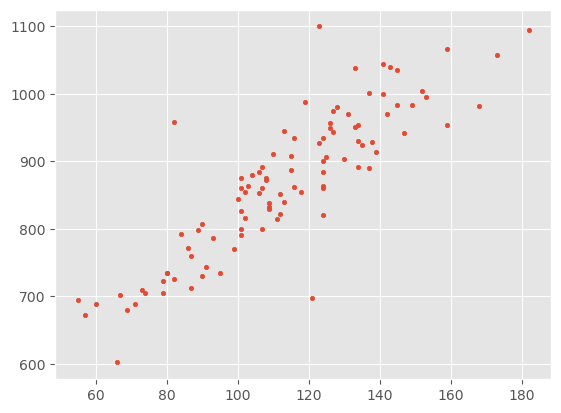

In [39]:
style.use('ggplot')
plt.scatter(arr[:,0],arr[:,1],s=10)
plt.show()

In [40]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    #def predict(self,data):
       # distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        #classification = distances.index(min(distances))
        #return classification

In [41]:
clf = K_Means()
clf.fit(arr)
colors = 10*["g","r","c","b","k"]
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=10, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=10, linewidths=5)
        
plt.show()

TypeError: 'dict' object is not callable